# IMDB MOVIE DATA SET

### My data set is a collection of 5000 movies off the IMDB database and includes a wide variety of information in the columns.

### This data was scraped by a user on Kaggle and was done for the sake of experimental analysis and learning. The data was intended for people like me, looking to compare the data and make links, potentially in the realm of predicting a movies IMDB score based on its attributes.

### Prepping my notebook - note: I have imported extra packages seaborn, wordcloud and ggplot for experimenting with.


In [1]:
# -*- coding: UTF-8 -*-
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import os
from wordcloud import WordCloud
from ggplot import *
%matplotlib inline

### Nice formatting yay

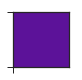

In [2]:
saved_style_state = matplotlib.rcParams.copy()
sns.set_style("ticks", {'axes.grid' : False})
sns.palplot(sns.color_palette(["#5c1299"]))
sns.set_palette(["#5c1299"])
params = {'axes.labelsize':20, 'figure.figsize': (20,10), 'axes.titlesize':30, 'xtick.labelsize':16, 'ytick.labelsize':16}
pylab.rcParams.update(params)

### Pre-processing, all of the movie titles have a weird non-latin character at the end of them so I need to tell pandas how to read it correctly. The data also contains a few unusual duplicates that differ by a single digit in a column so I have dropped duplciates.

In [3]:
movies = pd.read_csv("moviedata.csv", encoding='UTF-8')
print(movies.shape)
movies = movies.drop_duplicates(subset='movie_title')
print(movies.shape)

(5043, 28)
(4917, 28)


### I need to create a new dataframe that is called num_movies which will just include columns that count numbers rather than words and then replace NaN with 0.

In [4]:
strings = []
for colname, colvalue in movies.iteritems():
    if type(colvalue[1]) == str:
        strings.append(colname)
num_list = movies.columns.difference(strings)

In [5]:
num_movies = movies[num_list]

In [6]:
num_movies = num_movies.fillna(value=0, axis =1)

### Lets see what columns we have in both of these dataframes.

In [7]:
movies.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

In [8]:
num_movies.columns

Index([u'actor_1_facebook_likes', u'actor_1_name', u'actor_2_facebook_likes',
       u'actor_2_name', u'actor_3_facebook_likes', u'actor_3_name',
       u'aspect_ratio', u'budget', u'cast_total_facebook_likes', u'color',
       u'content_rating', u'country', u'director_facebook_likes',
       u'director_name', u'duration', u'facenumber_in_poster', u'genres',
       u'gross', u'imdb_score', u'language', u'movie_facebook_likes',
       u'movie_imdb_link', u'movie_title', u'num_critic_for_reviews',
       u'num_user_for_reviews', u'num_voted_users', u'plot_keywords',
       u'title_year'],
      dtype='object')

### Here we can see what an example movie looks like and the kind of data we get to view (Avatar).

In [9]:
row_one = movies.iloc[0]
row_one

color                                                                    Color
director_name                                                    James Cameron
num_critic_for_reviews                                                     723
duration                                                                   178
director_facebook_likes                                                      0
actor_3_facebook_likes                                                     855
actor_2_name                                                  Joel David Moore
actor_1_facebook_likes                                                    1000
gross                                                              7.60506e+08
genres                                         Action|Adventure|Fantasy|Sci-Fi
actor_1_name                                                       CCH Pounder
movie_title                                                            Avatar 
num_voted_users                                     

# Non-numerical graphs
### To start I will plot all of the columns that contain strings rather than integers.

### The number of coloured vs black & white films.

In [10]:
movies["color"].value_counts()

Color               4694
 Black and White     204
Name: color, dtype: int64

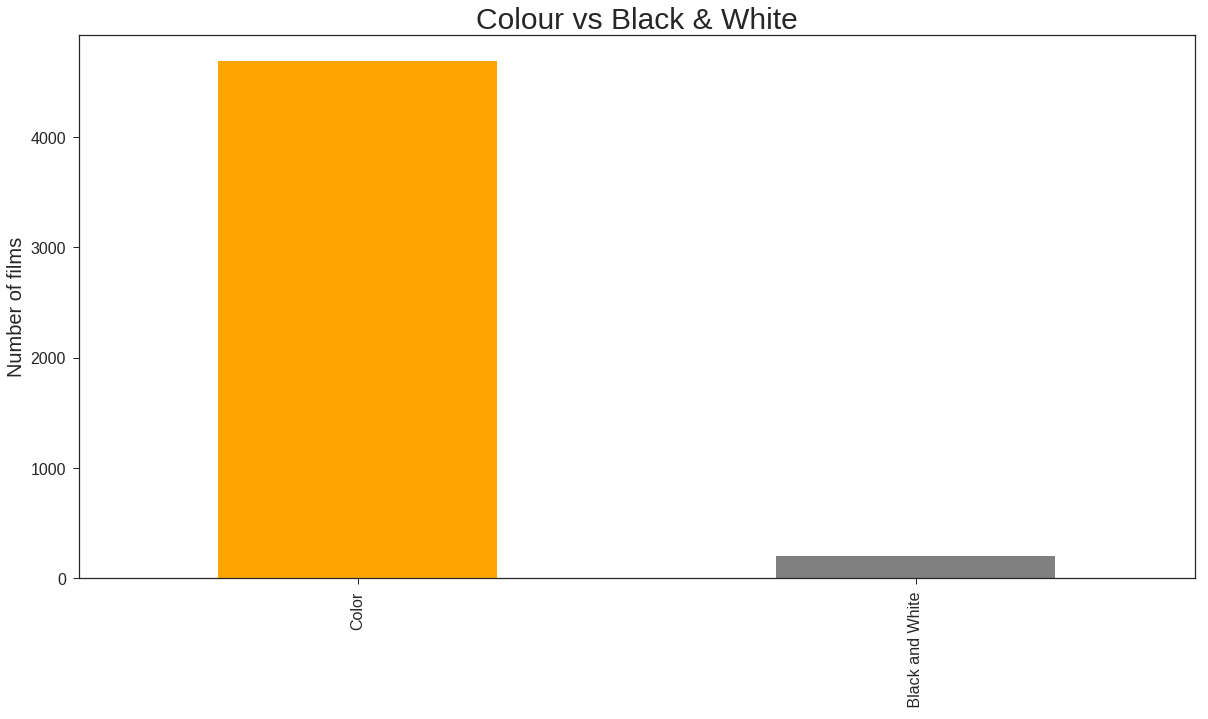

In [11]:
colours = ['orange', 'gray']
movies["color"].value_counts().plot(kind="bar", color=colours)
plt.title("Colour vs Black & White")
plt.ylabel("Number of films")

### The directors with the most movies.

In [12]:
dname = movies["director_name"].value_counts()

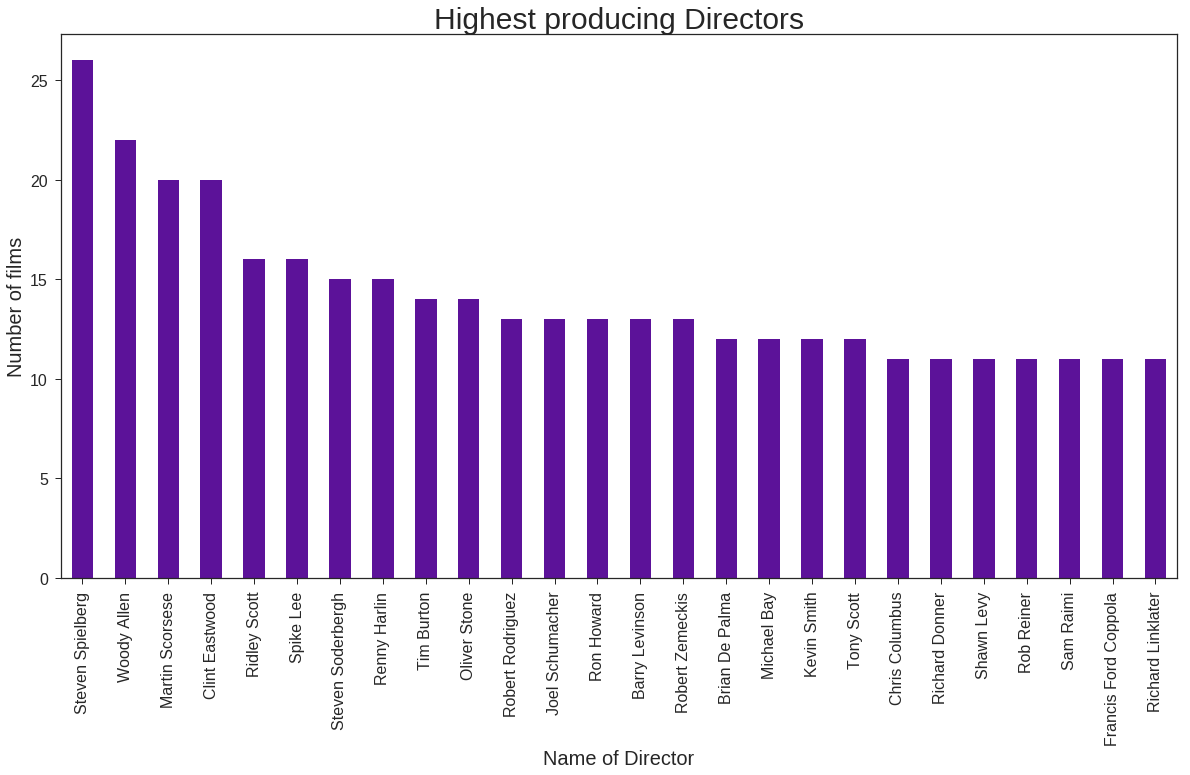

In [13]:
dname[dname > 10].plot(kind="bar")
plt.title("Highest producing Directors")
plt.ylabel("Number of films")
plt.xlabel("Name of Director")

### Actors with the most movies, starting with lead actors and then secondary and tertiary.

In [14]:
a1 = movies["actor_1_name"].value_counts()

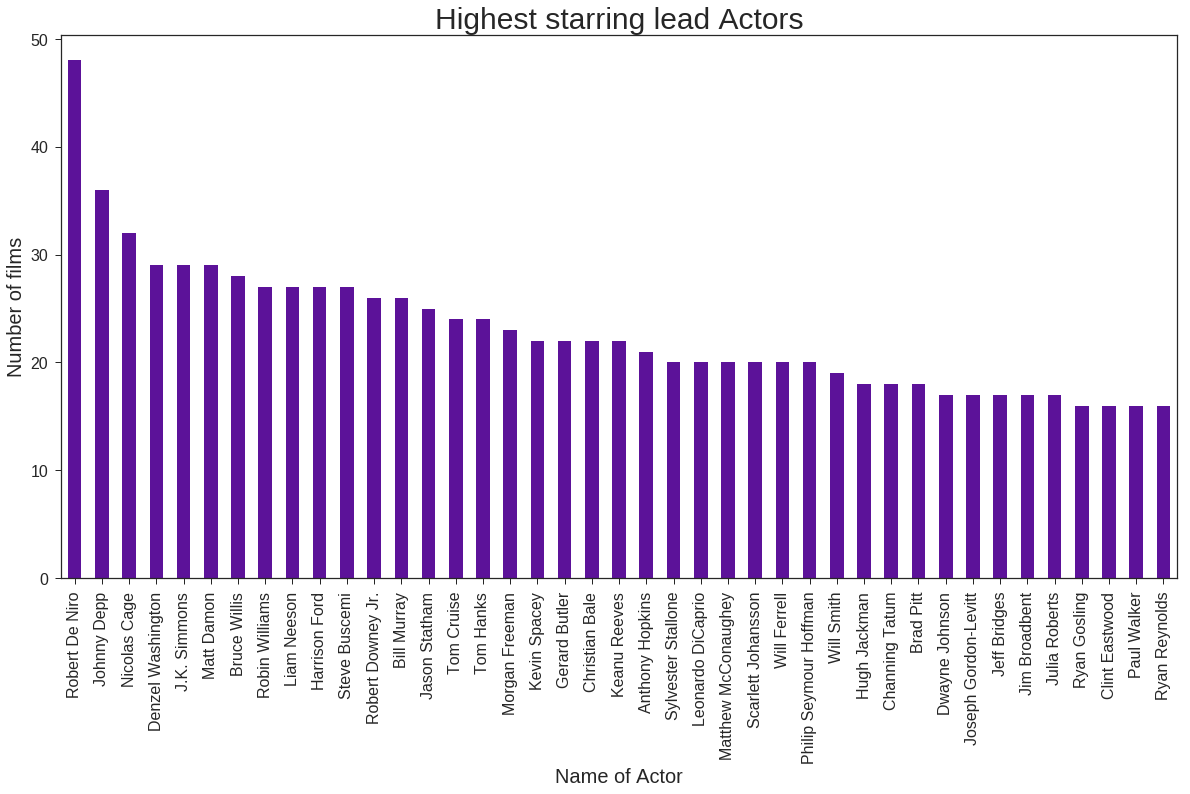

In [15]:
a1[a1 > 15].plot(kind="bar")
plt.title("Highest starring lead Actors")
plt.ylabel("Number of films")
plt.xlabel("Name of Actor")

In [16]:
a2 = movies["actor_2_name"].value_counts()

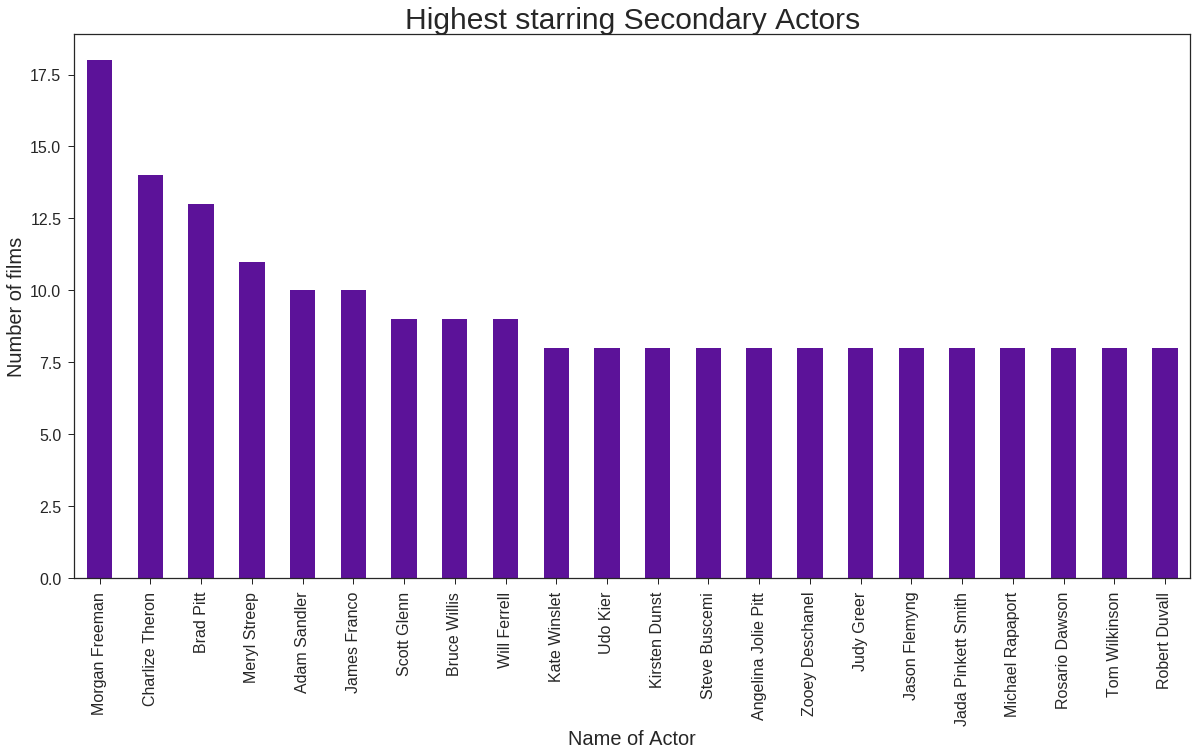

In [17]:
a2[a2 > 7].plot(kind="bar")
plt.title("Highest starring Secondary Actors")
plt.ylabel("Number of films")
plt.xlabel("Name of Actor")

In [18]:
a3 = movies["actor_3_name"].value_counts()


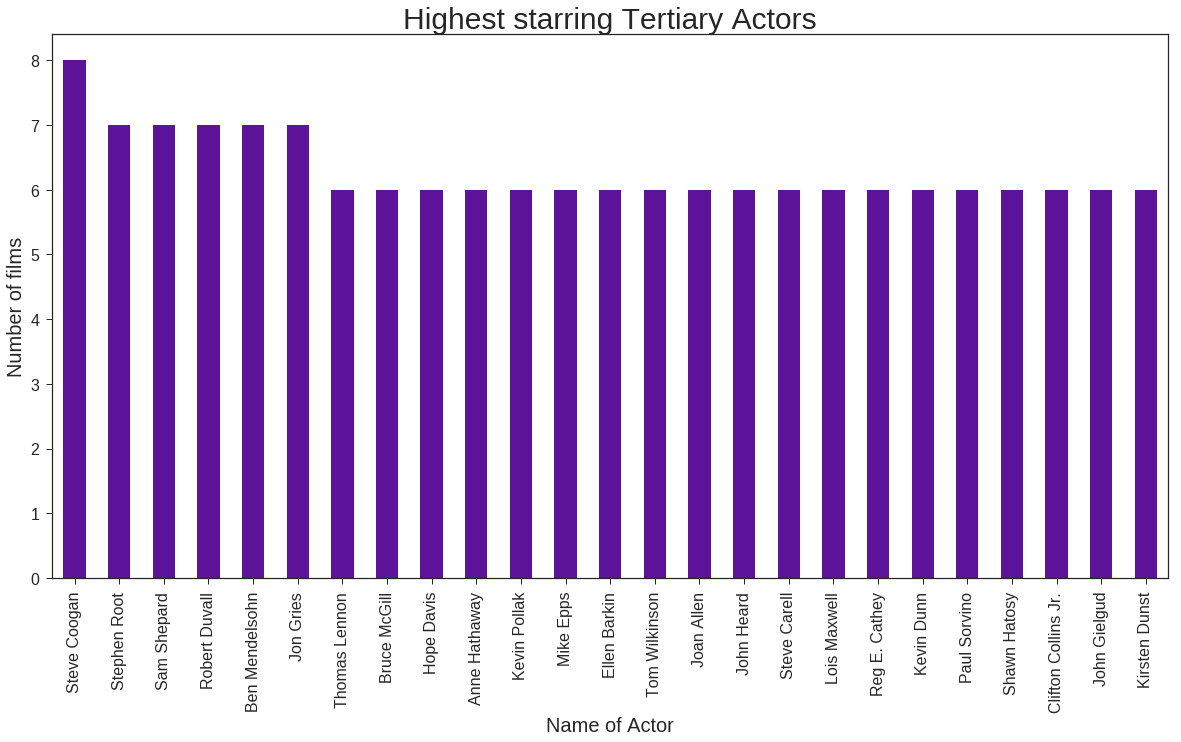

In [19]:
a3[a3 > 5].plot(kind="bar")
plt.title("Highest starring Tertiary Actors")
plt.ylabel("Number of films")
plt.xlabel("Name of Actor")

### The most common genres.

In [20]:
genres = movies["genres"].value_counts()
print genres

Drama                                                               233
Comedy                                                              205
Comedy|Drama                                                        189
Comedy|Drama|Romance                                                185
Comedy|Romance                                                      157
Drama|Romance                                                       150
Crime|Drama|Thriller                                                 98
Horror                                                               67
Action|Crime|Drama|Thriller                                          65
Drama|Thriller                                                       62
Action|Crime|Thriller                                                62
Crime|Drama                                                          62
Crime|Drama|Mystery|Thriller                                         53
Horror|Thriller                                                 

### I came across the issue of the pipes between the different genres. This meant that there were way too many unique combinations so I have split them and then counted the sum after that. The number of times 'drama' appears increases ten fold!

In [21]:
gen = movies["genres"].notnull()
movies["genres"][gen].apply(lambda x :x.split("|"))
movies["single_genres"] = movies["genres"][gen].apply(lambda x :x.split("|"))

splitg = movies["single_genres"].apply(lambda x : pd.Series(x).value_counts()).sum().sort_values(ascending = False)
print splitg

Drama          2533.0
Comedy         1847.0
Thriller       1364.0
Action         1113.0
Romance        1084.0
Adventure       888.0
Crime           868.0
Sci-Fi          594.0
Fantasy         583.0
Horror          539.0
Family          534.0
Mystery         485.0
Biography       291.0
Animation       240.0
Music           212.0
War             210.0
History         202.0
Sport           177.0
Musical         131.0
Documentary     121.0
Western          94.0
Film-Noir         6.0
Short             5.0
News              3.0
Reality-TV        2.0
Game-Show         1.0
dtype: float64


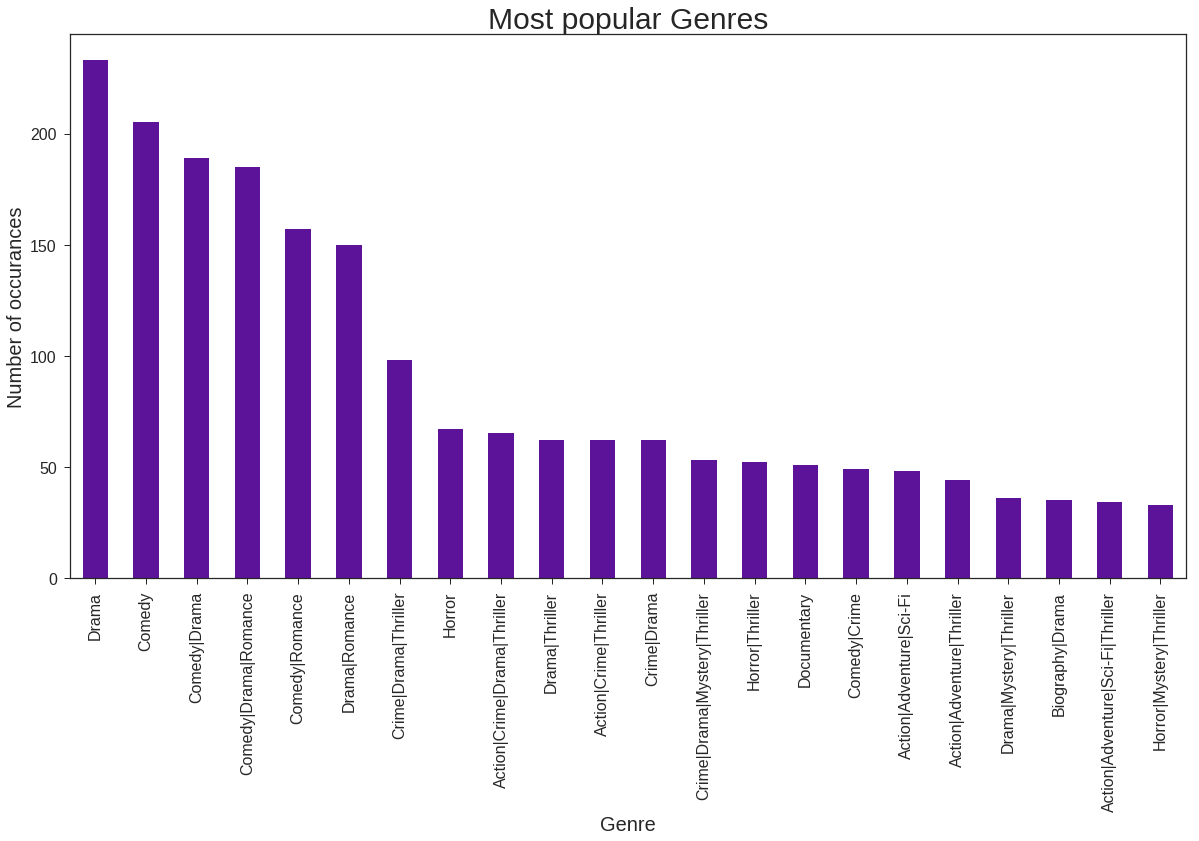

In [22]:
genres[genres > 30].plot(kind="bar")
plt.title("Most popular Genres")
plt.ylabel("Number of occurances")
plt.xlabel("Genre")

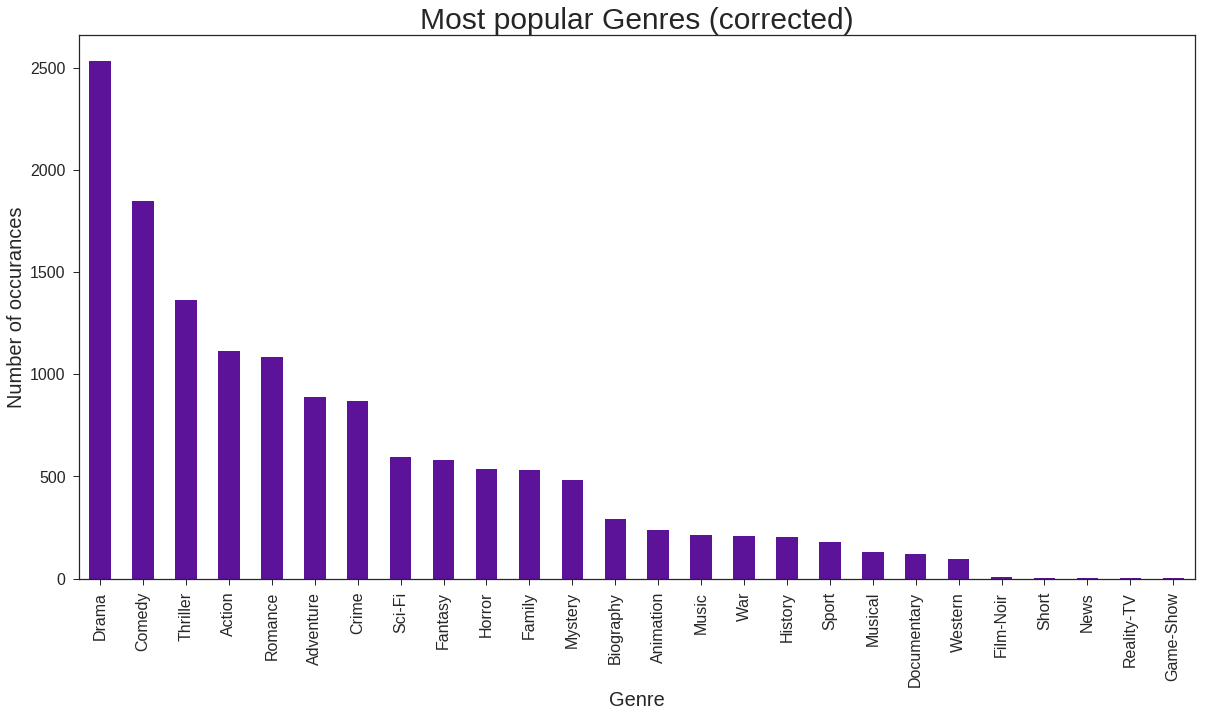

In [23]:
splitg.plot(kind="bar")
plt.title("Most popular Genres (corrected)")
plt.ylabel("Number of occurances")
plt.xlabel("Genre")

### Having learnt a lesson from the genres, I performed the same function on the keywords as they suffer from unique combinations even more so.

In [24]:
keyword = movies["plot_keywords"].notnull()
movies["plot_keywords"][keyword].apply(lambda x :x.split("|"))
movies["good_keywords"] = movies["plot_keywords"][keyword].apply(lambda x :x.split("|"))
gwords = movies["good_keywords"].apply(lambda x : pd.Series(x).value_counts()).sum().sort_values(ascending = False)

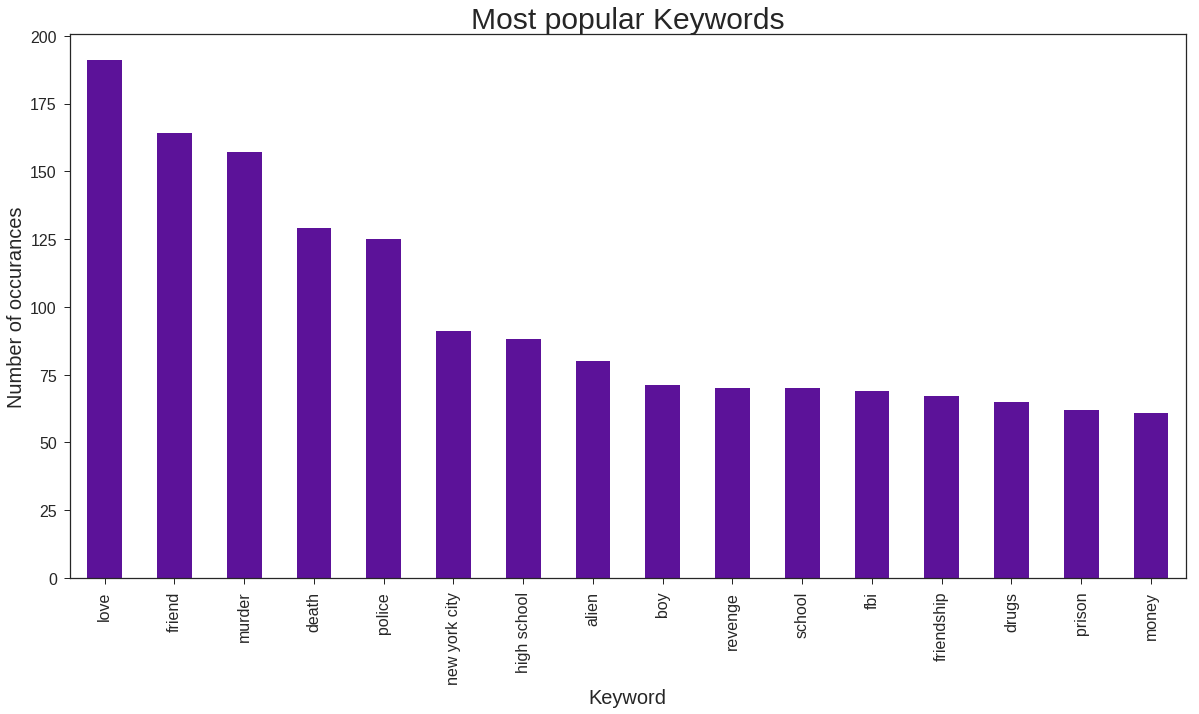

In [25]:
gwords[gwords > 60].plot(kind="bar")
plt.title("Most popular Keywords")
plt.ylabel("Number of occurances")
plt.xlabel("Keyword")

### Comparison of languages. The selection of movies heavily favours English movies.

In [26]:
lang = movies["language"].value_counts()
print lang

English       4583
French          73
Spanish         40
Hindi           28
Mandarin        24
German          19
Japanese        17
Cantonese       11
Russian         11
Italian         11
Portuguese       8
Korean           7
Arabic           5
Swedish          5
Hebrew           5
Danish           5
Persian          4
Dutch            4
Norwegian        4
Thai             3
Polish           3
Chinese          3
None             2
Zulu             2
Aboriginal       2
Icelandic        2
Romanian         2
Dari             2
Indonesian       2
Urdu             1
Czech            1
Filipino         1
Tamil            1
Slovenian        1
Swahili          1
Aramaic          1
Greek            1
Hungarian        1
Bosnian          1
Kazakh           1
Panjabi          1
Kannada          1
Mongolian        1
Dzongkha         1
Vietnamese       1
Maya             1
Telugu           1
Name: language, dtype: int64


4905
English    322
Name: language, dtype: int64


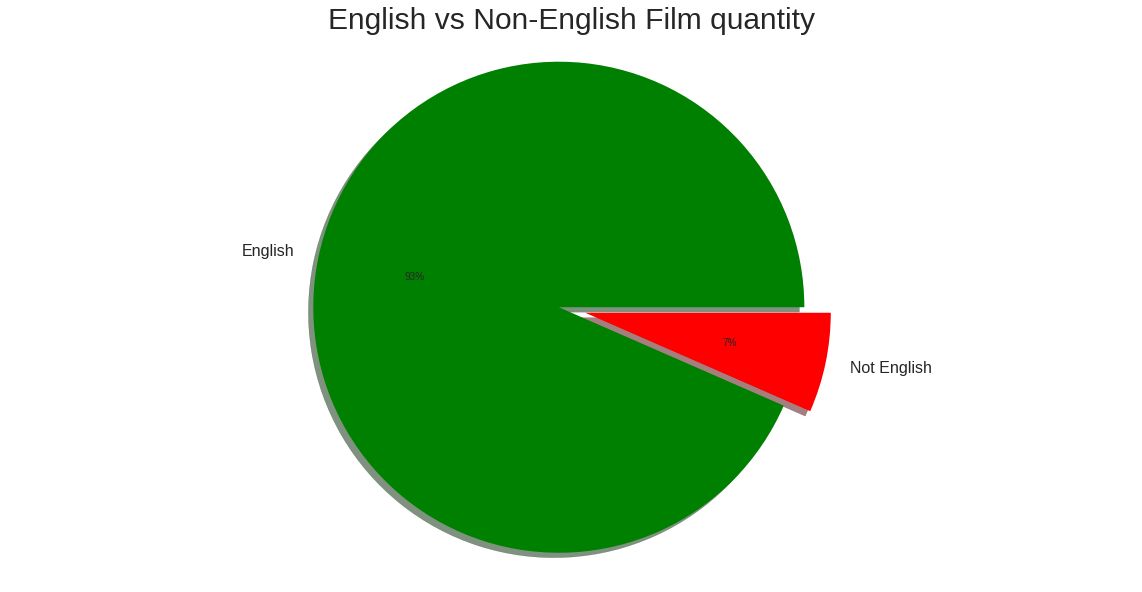

In [27]:
sum_lang = sum(lang)
print sum_lang
minus = sum_lang - lang.head(1)
print minus
labels = ['English', 'Not English']  
explode = (0.1, 0.01)

f, ax1 = plt.subplots()
ax1.pie((lang.head(1), minus), colors=('green', 'red'), explode=explode, labels=labels, autopct='%1.0f%%', shadow=True)
ax1.axis('equal')
plt.title("English vs Non-English Film quantity")
plt.show()

### Distribution of ratings. Note this is American rating system (There aren't actually 2068 R rated movies)

In [28]:
rating = movies["content_rating"].value_counts()

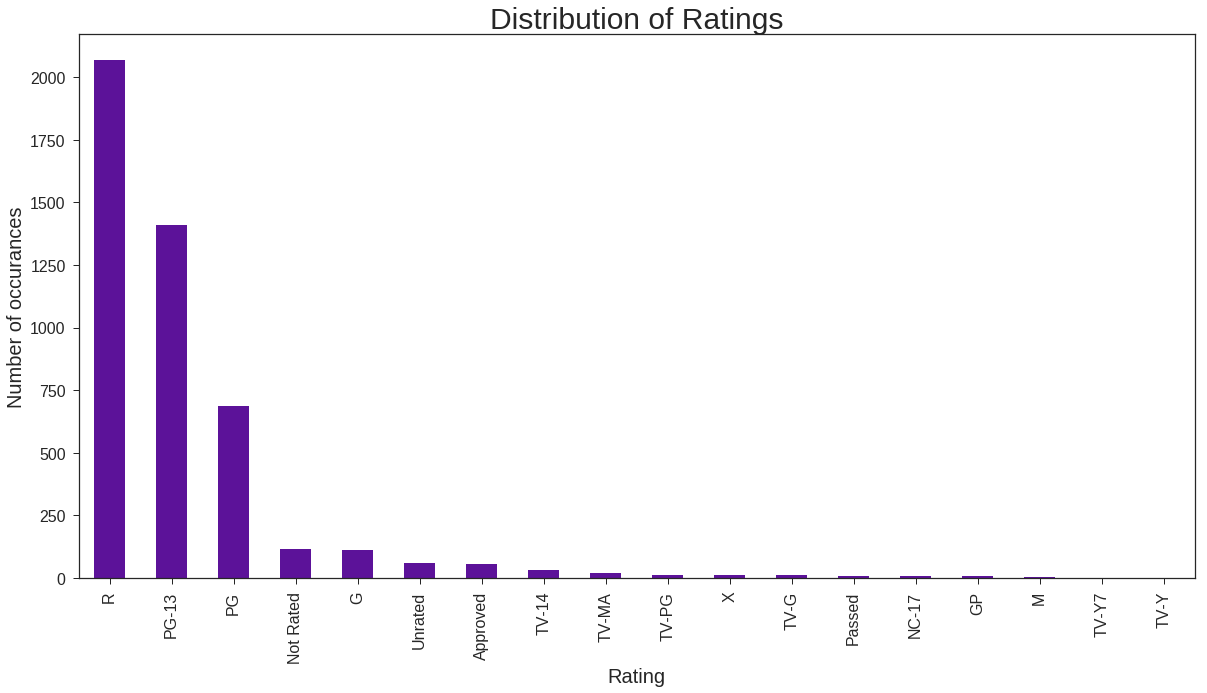

In [29]:
rating.plot(kind="bar")
plt.title("Distribution of Ratings")
plt.ylabel("Number of occurances")
plt.xlabel("Rating")

### Distribution of release years.

In [30]:
year = movies["title_year"].value_counts()

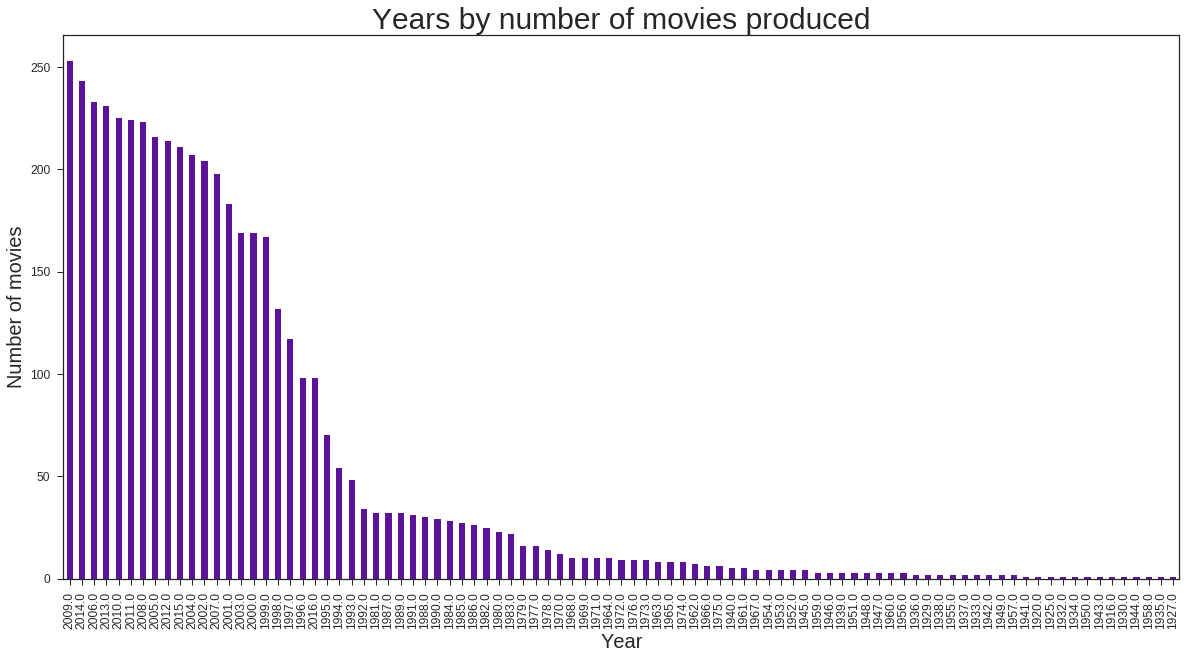

In [31]:
year.plot(kind="bar")
plt.title("Years by number of movies produced")
plt.ylabel("Number of movies")
plt.tick_params(labelsize=12)
plt.xlabel("Year")

### Distribution of aspect ratios.

In [32]:
ratio = movies["aspect_ratio"].value_counts()

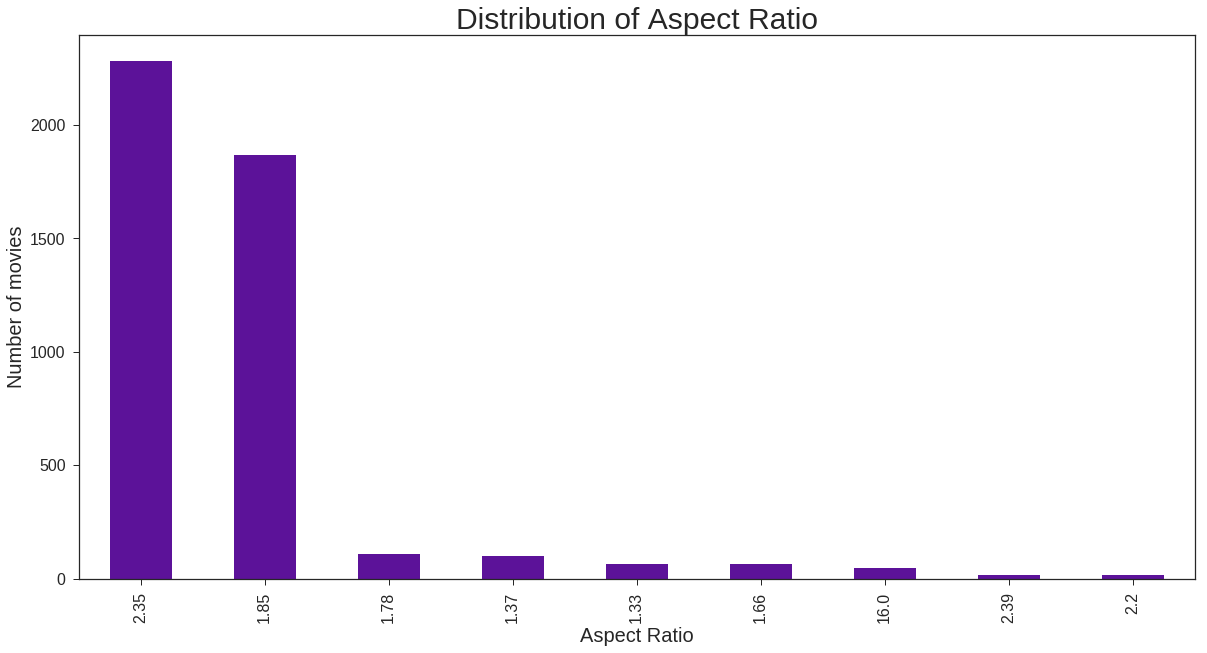

In [33]:
ratio[ratio > 10].plot(kind="bar")
plt.title("Distribution of Aspect Ratio")
plt.ylabel("Number of movies")
plt.xlabel("Aspect Ratio")

# Numeric Based Graphs

### Now it is time to plot all of the columns that contain integer values as histograms.

### The number of critic and user reviews/ratings.

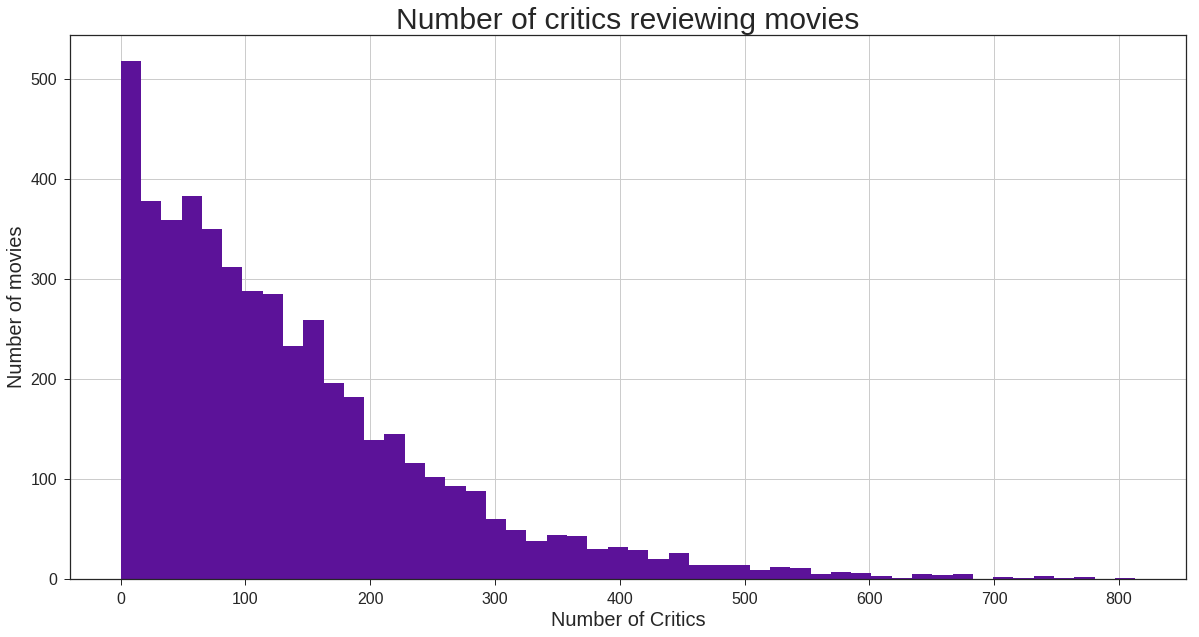

In [34]:
num_movies["num_critic_for_reviews"].hist(bins=50)
plt.title("Number of critics reviewing movies")
plt.ylabel("Number of movies")
plt.xlabel("Number of Critics")

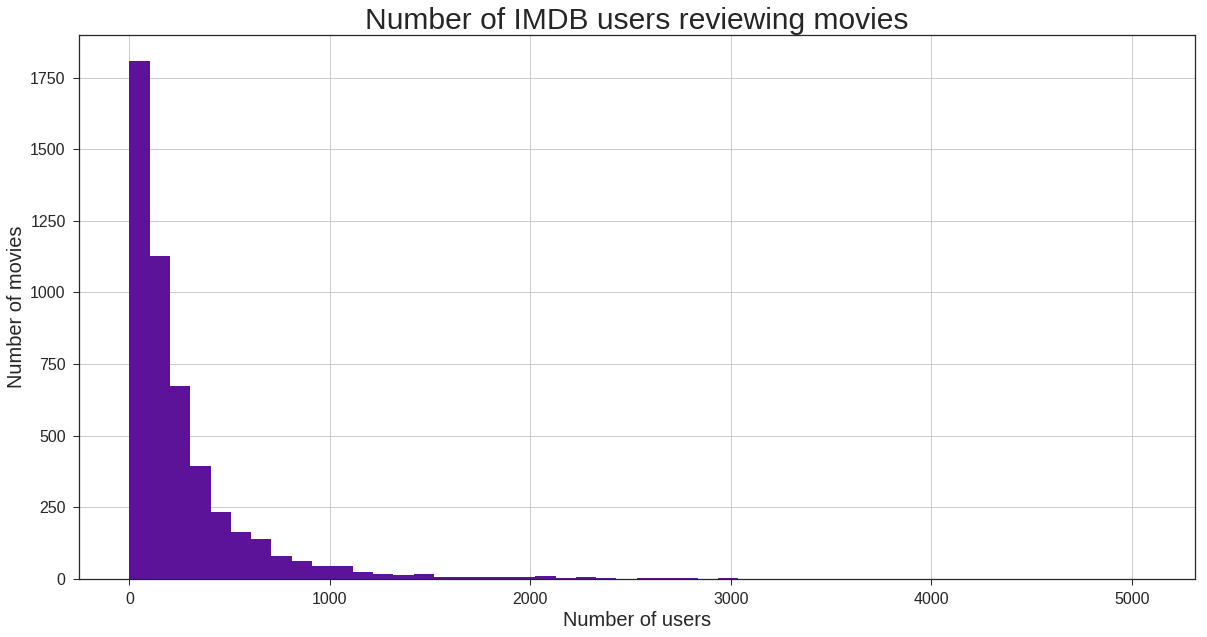

In [35]:
num_movies["num_user_for_reviews"].hist(bins=50)
plt.title("Number of IMDB users reviewing movies")
plt.ylabel("Number of movies")
plt.xlabel("Number of users")

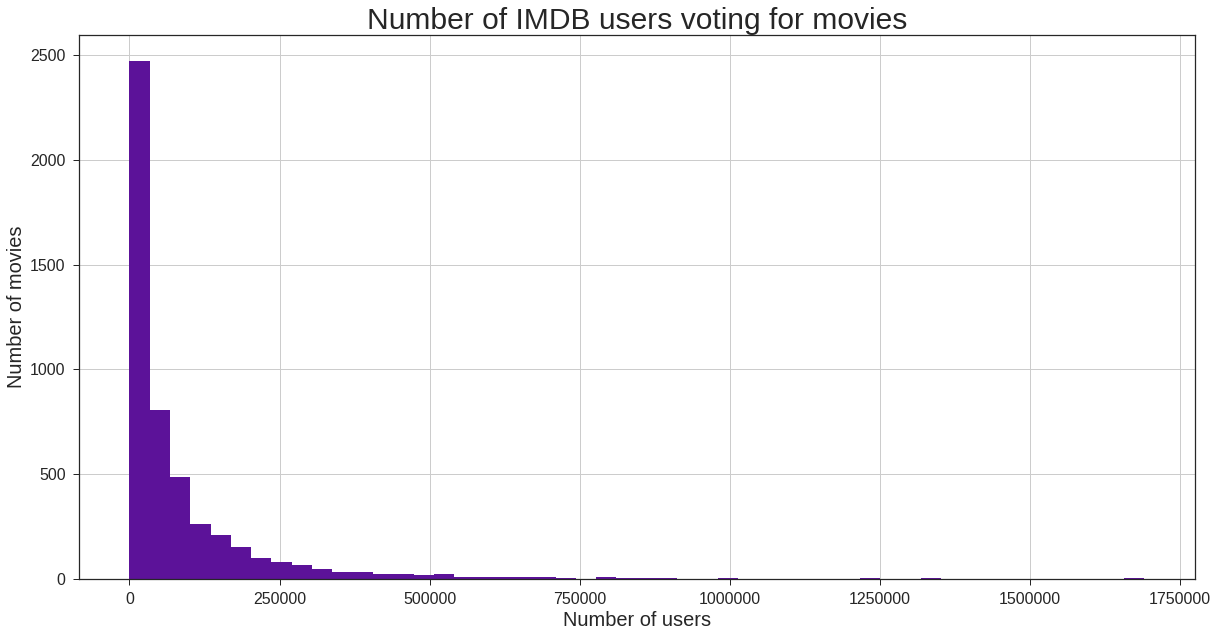

In [36]:
num_movies["num_voted_users"].hist(bins=50)
plt.title("Number of IMDB users voting for movies")
plt.ylabel("Number of movies")
plt.xlabel("Number of users")

### The duration of movies.

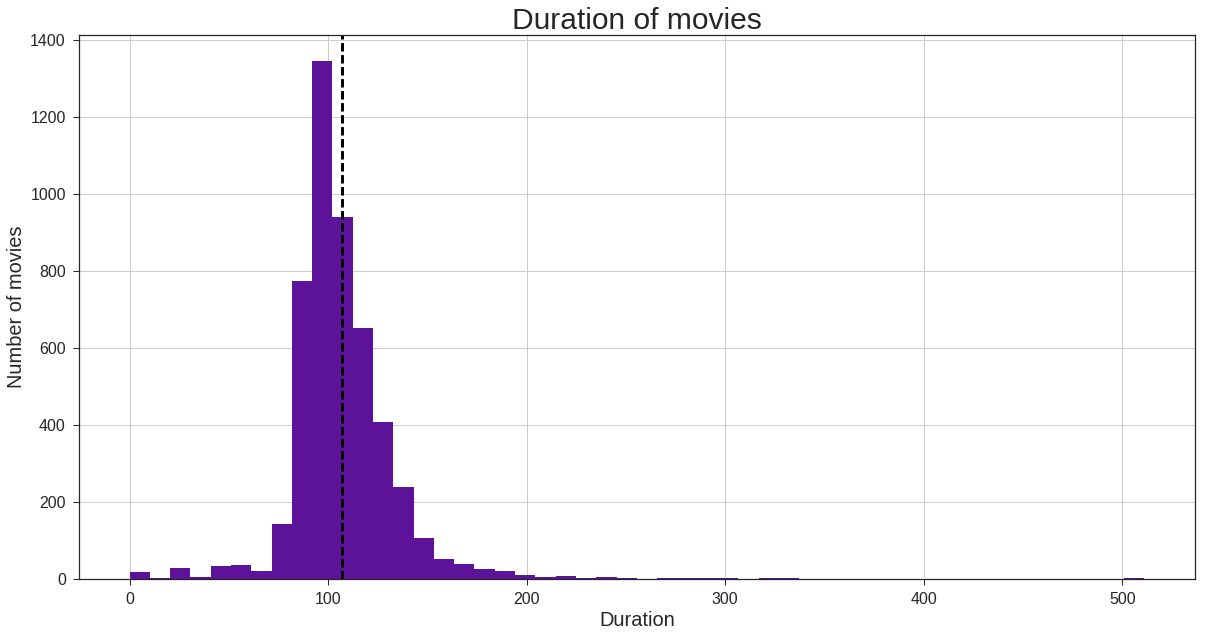

In [37]:
num_movies["duration"].hist(bins=50)
plt.axvline(num_movies["duration"].mean(), color='k', linestyle='dashed', linewidth=3)
plt.title("Duration of movies")
plt.ylabel("Number of movies")
plt.xlabel("Duration")

### The following graphs look at the number of facebook likes for directors, actors, movies and cast. Alot of the actors/directors don't actually have public profiles so a large number of results are 0 and therefore I have only plotted the values greater than 0.

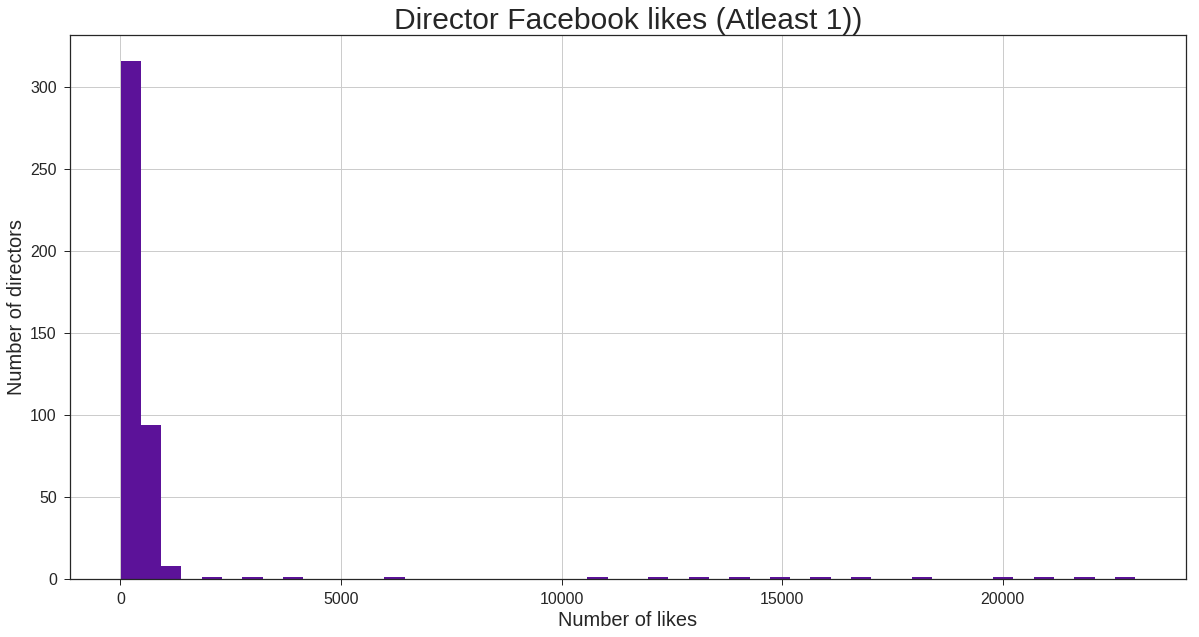

In [38]:
pos_dir_fb_likes = num_movies["director_facebook_likes"]
pos_dir_fb_likes[pos_dir_fb_likes > 0].drop_duplicates().hist(bins=50)
plt.title("Director Facebook likes (Atleast 1))")
plt.ylabel("Number of directors")
plt.xlabel("Number of likes")

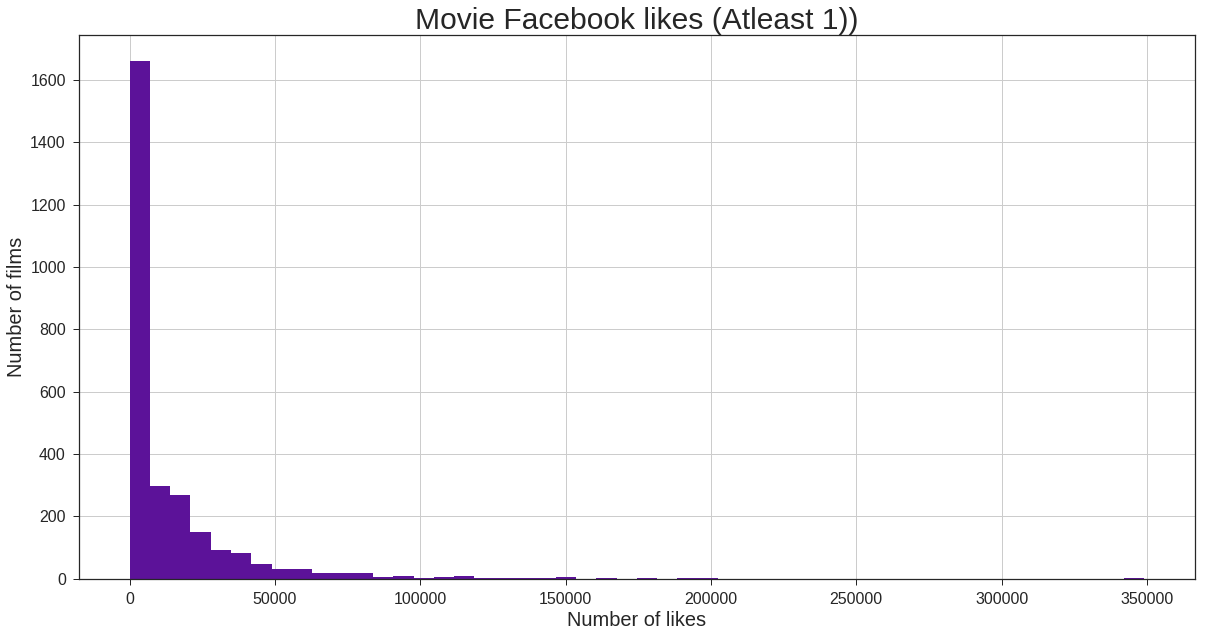

In [39]:
pos_fb_likes = num_movies["movie_facebook_likes"]
pos_fb_likes[pos_fb_likes > 0].hist(bins=50)
plt.title("Movie Facebook likes (Atleast 1))")
plt.ylabel("Number of films")
plt.xlabel("Number of likes")

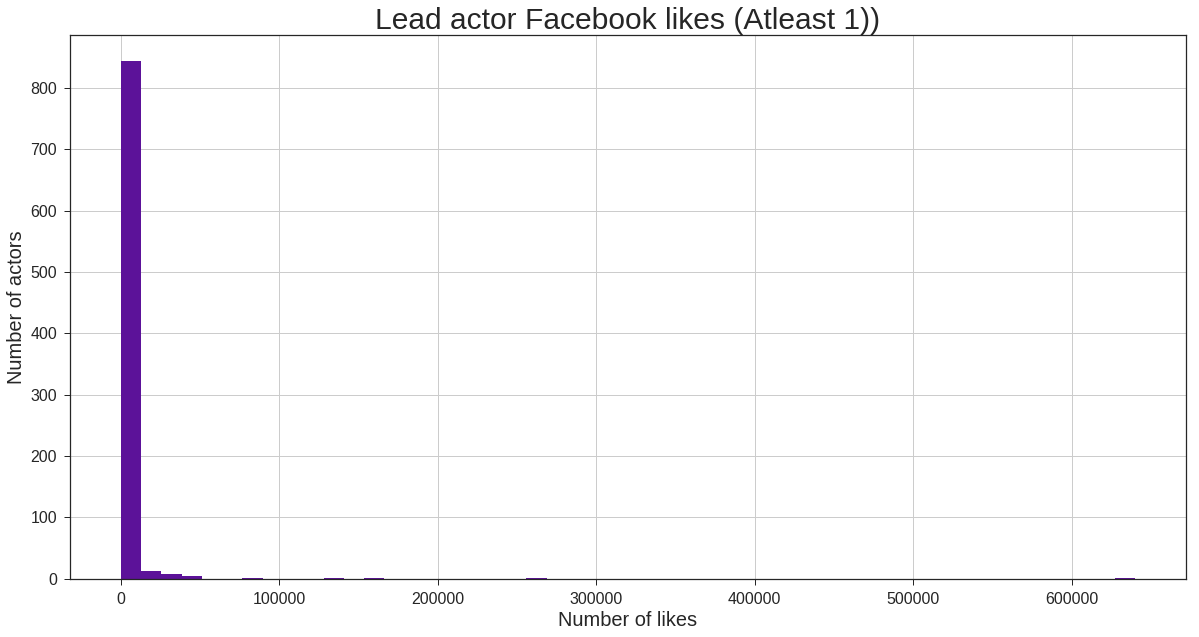

In [40]:
pos_1_fb_likes = num_movies["actor_1_facebook_likes"]
pos_1_fb_likes[pos_1_fb_likes > 0].drop_duplicates().hist(bins=50)
plt.title("Lead actor Facebook likes (Atleast 1))")
plt.ylabel("Number of actors")
plt.xlabel("Number of likes")

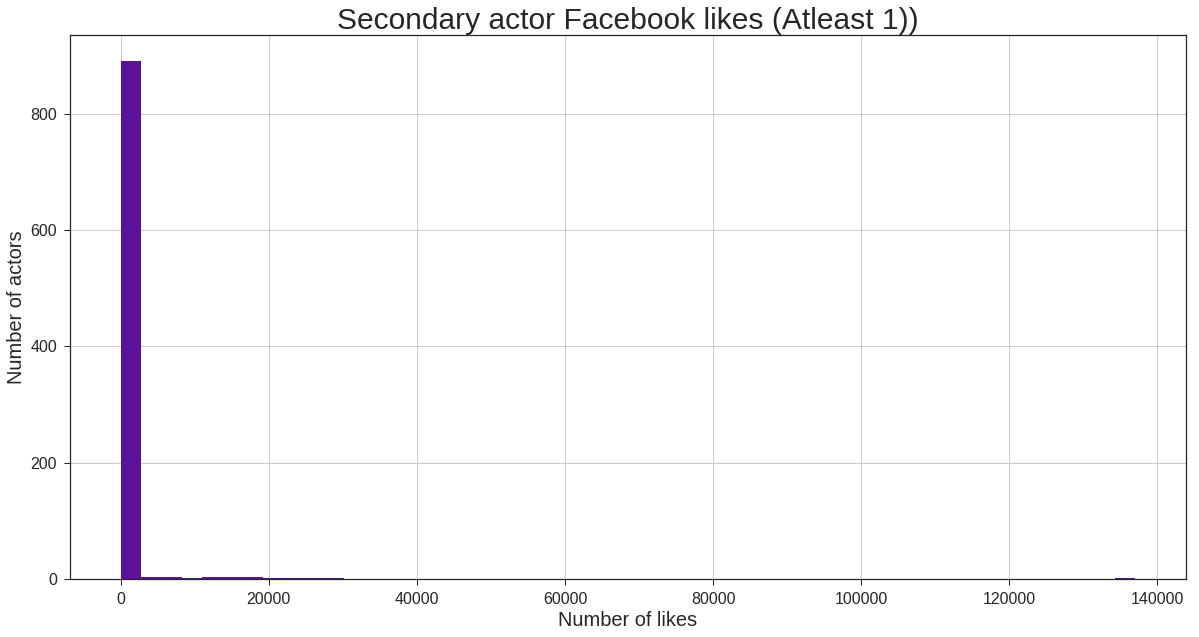

In [41]:
pos_2_fb_likes = num_movies["actor_2_facebook_likes"]
pos_2_fb_likes[pos_2_fb_likes > 0].drop_duplicates().hist(bins=50)
plt.title("Secondary actor Facebook likes (Atleast 1))")
plt.ylabel("Number of actors")
plt.xlabel("Number of likes")

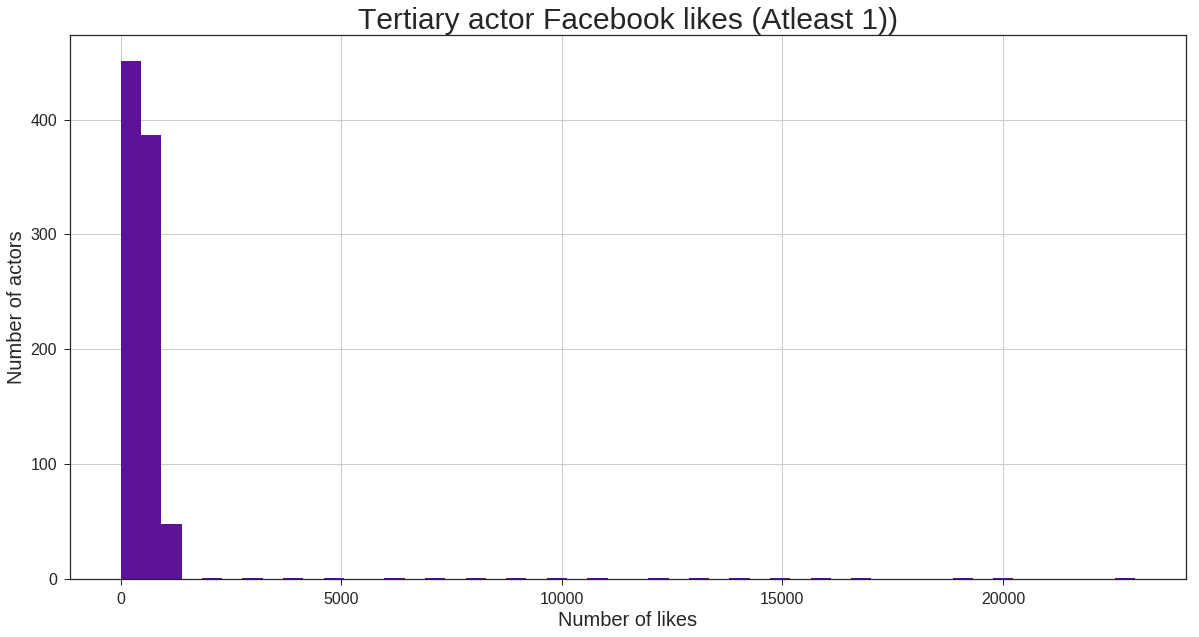

In [42]:
pos_3_fb_likes = num_movies["actor_3_facebook_likes"]
pos_3_fb_likes[pos_3_fb_likes > 0].drop_duplicates().hist(bins=50)
plt.title("Tertiary actor Facebook likes (Atleast 1))")
plt.ylabel("Number of actors")
plt.xlabel("Number of likes")

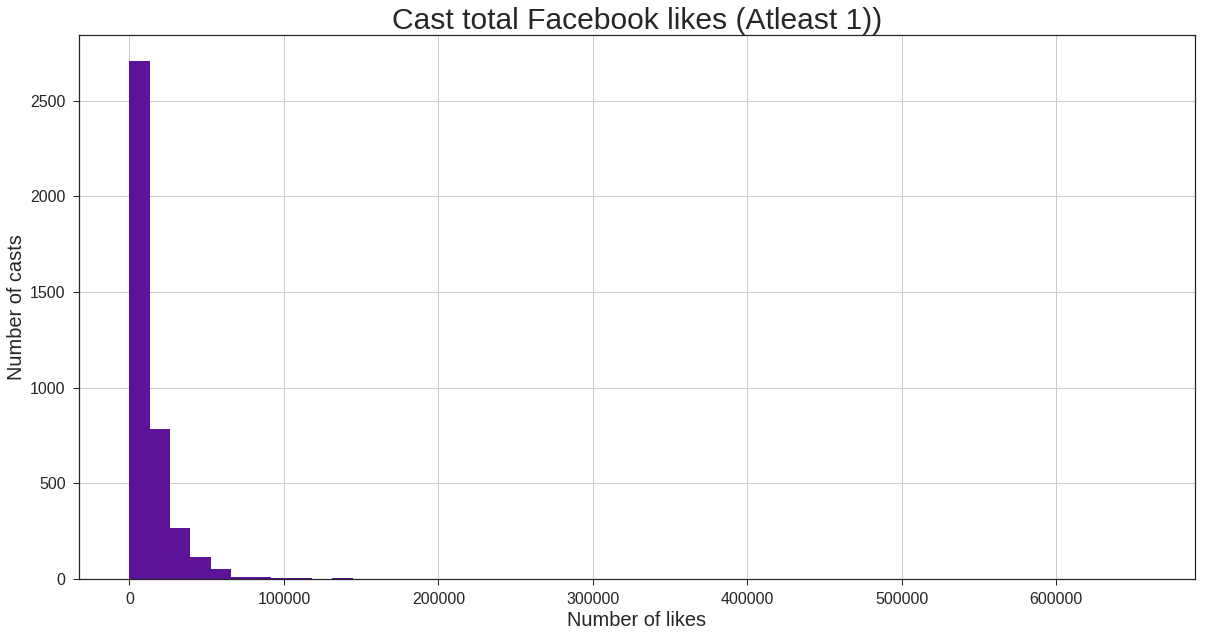

In [43]:
pos_cast_fb_likes = num_movies["cast_total_facebook_likes"]
pos_cast_fb_likes[pos_cast_fb_likes > 0].drop_duplicates().hist(bins=50)
plt.title("Cast total Facebook likes (Atleast 1))")
plt.ylabel("Number of casts")
plt.xlabel("Number of likes")

### The user who collected this data also ran an interesting algorithm that scanned movie posters for the facecount.

0.0     2103
1.0     1224
2.0      702
3.0      369
4.0      198
5.0      113
6.0       75
7.0       48
8.0       37
9.0       17
10.0      10
15.0       6
11.0       5
12.0       4
13.0       2
19.0       1
14.0       1
31.0       1
43.0       1
Name: facenumber_in_poster, dtype: int64

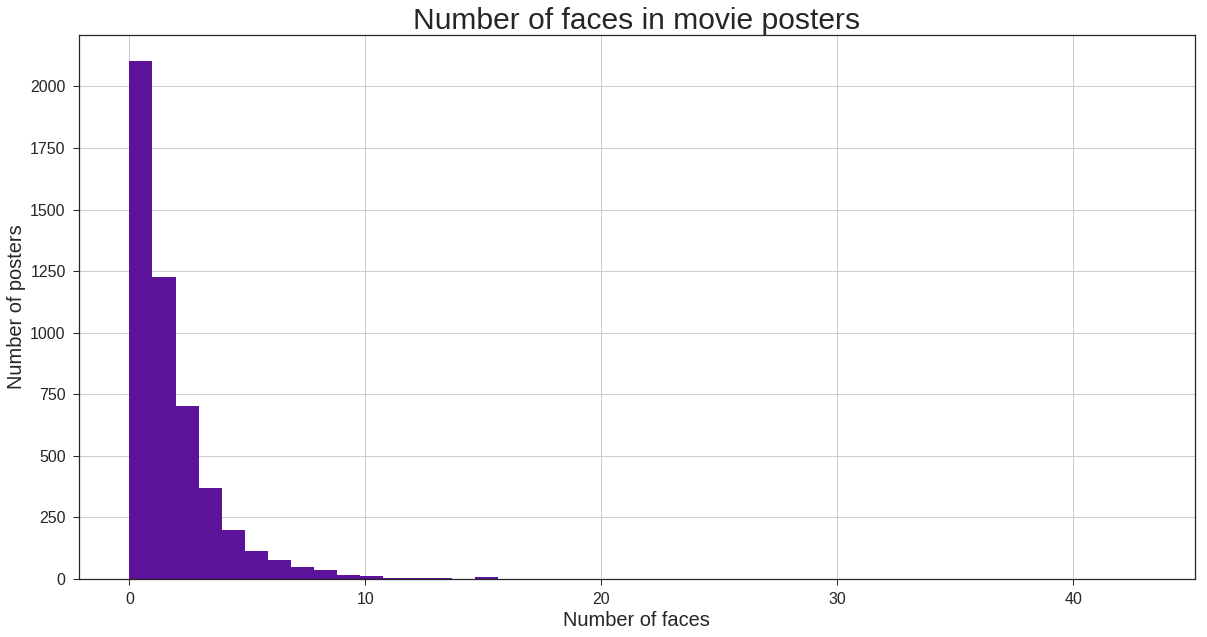

In [44]:
num_movies["facenumber_in_poster"].hist(bins=44)
plt.title("Number of faces in movie posters")
plt.ylabel("Number of posters")
plt.xlabel("Number of faces")
num_movies["facenumber_in_poster"].value_counts()

### I figured I should test this and check it is accurate. I was also curious what movie poster had 43 faces...

In [45]:
movie_faces = zip(range(len(num_movies["facenumber_in_poster"])),num_movies["facenumber_in_poster"])

for movie in movie_faces:
    if movie[0] == 1:
        print movies["movie_title"][movie[0]] + "(Number of Faces = 1)"

for movie in movie_faces:
    if movie[0] == 2:
        print movies["movie_title"][movie[0]] + "(Number of Faces = 2)"
        
for movie in movie_faces:
    if movie[0] == 43:
        print movies["movie_title"][movie[0]] + "(Number of Faces = 43)"
        

        

Pirates of the Caribbean: At World's End (Number of Faces = 1)
Spectre (Number of Faces = 2)
Toy Story 3 (Number of Faces = 43)


![](http://www.impawards.com/2007/posters/pirates_of_the_caribbean_at_worlds_end_xlg.jpg)
![](http://www.impawards.com/2015/posters/spectre_ver5.jpg)
![](http://www.impawards.com/2010/posters/toy_story_three_ver10.jpg)

### The graphs below explore gross earnings and budgets.

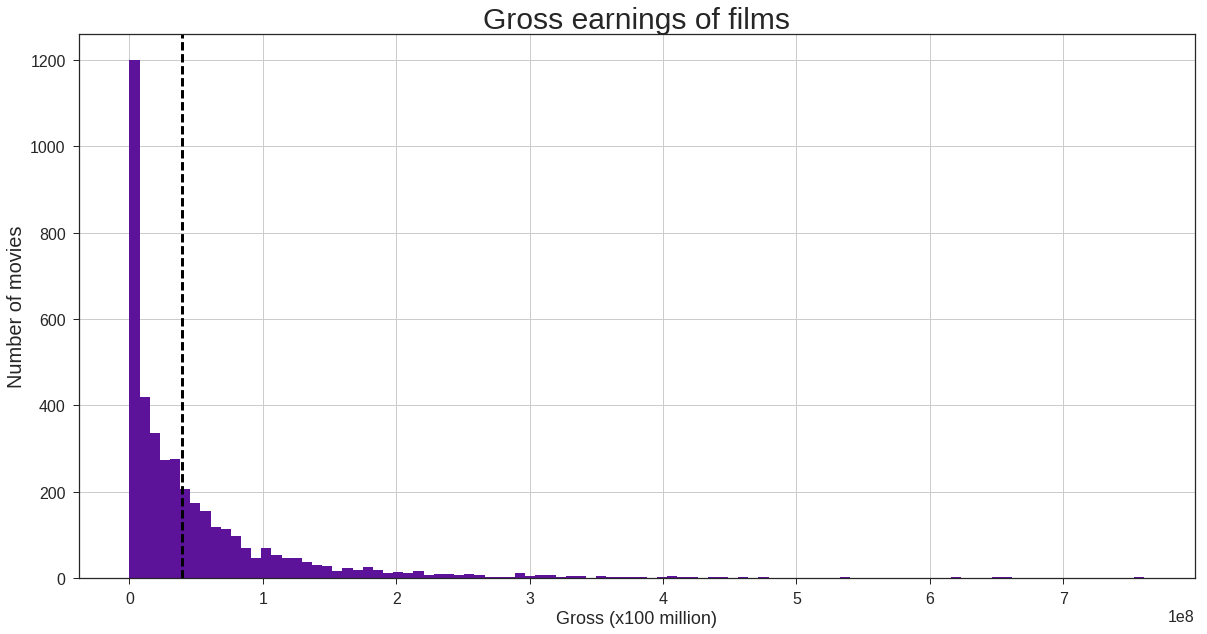

In [46]:
pos_gross = num_movies["gross"]
pos_gross[pos_gross > 0].hist(bins=100)
plt.xlabel('Gross (x100 million)', fontsize=18)
plt.title("Gross earnings of films")
plt.ylabel("Number of movies")
plt.axvline(num_movies["gross"].mean(), color='k', linestyle='dashed', linewidth=3)

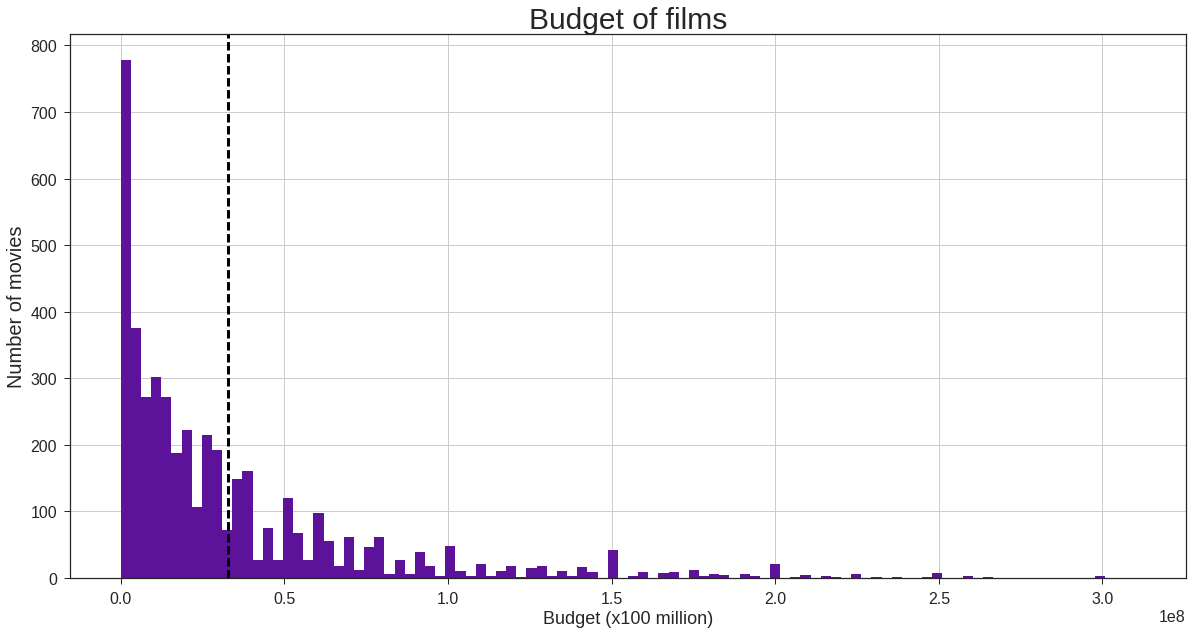

In [47]:
pos_budget = num_movies["budget"]
pos_budget[pos_budget > 0].hist(bins=100, range=[0,310000000])
plt.xlabel('Budget (x100 million)', fontsize=18)
plt.title("Budget of films")
plt.ylabel("Number of movies")
plt.axvline(num_movies["budget"].mean(), color='k', linestyle='dashed', linewidth=3)

### I decided to do a simple histogram comparison of the two, and while this is not the best way of doing this, it shows the general trend of low budget movies being less likely to gross well.

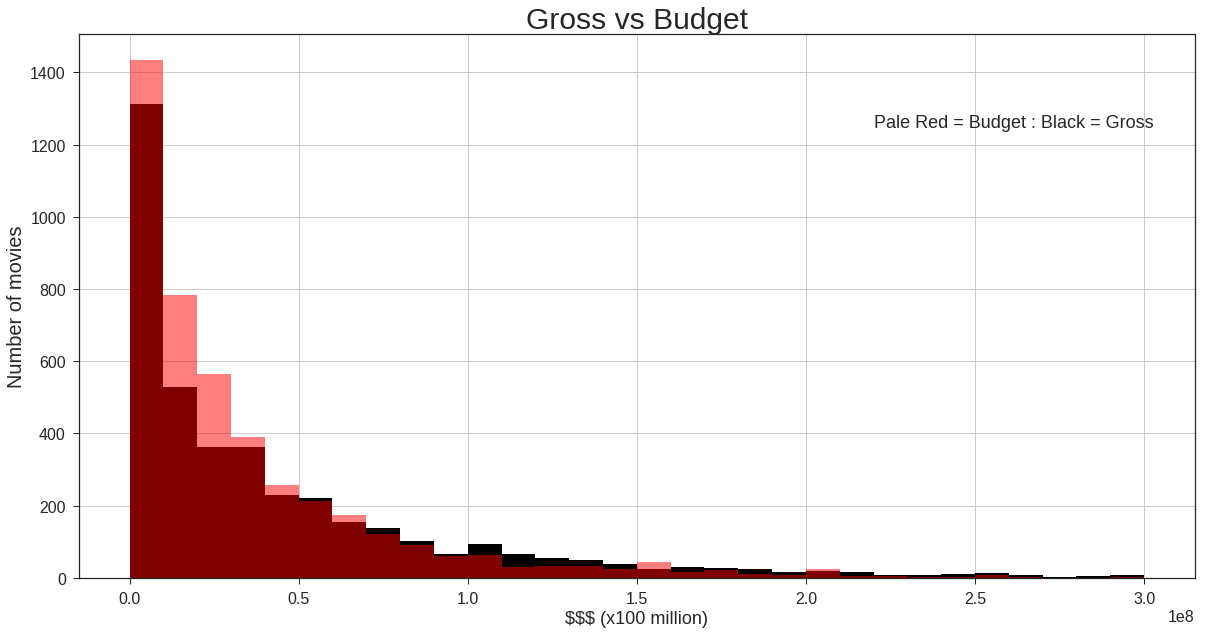

In [48]:
ax1 = pos_gross[pos_gross > 0].hist(bins=30, alpha=1, range=[0,300000000], color='k')
ax2 = pos_budget[pos_budget > 0].hist(bins=30, range=[0,300000000], alpha=0.5, color='r')
plt.title("Gross vs Budget")
plt.ylabel("Number of movies")
plt.xlabel('$$$ (x100 million)', fontsize=18)
plt.text(220000000, 1250, 'Pale Red = Budget : Black = Gross', {'size': 18})


### IMDB Score distribution as well as a table of the top 10 and bottom 10 movies

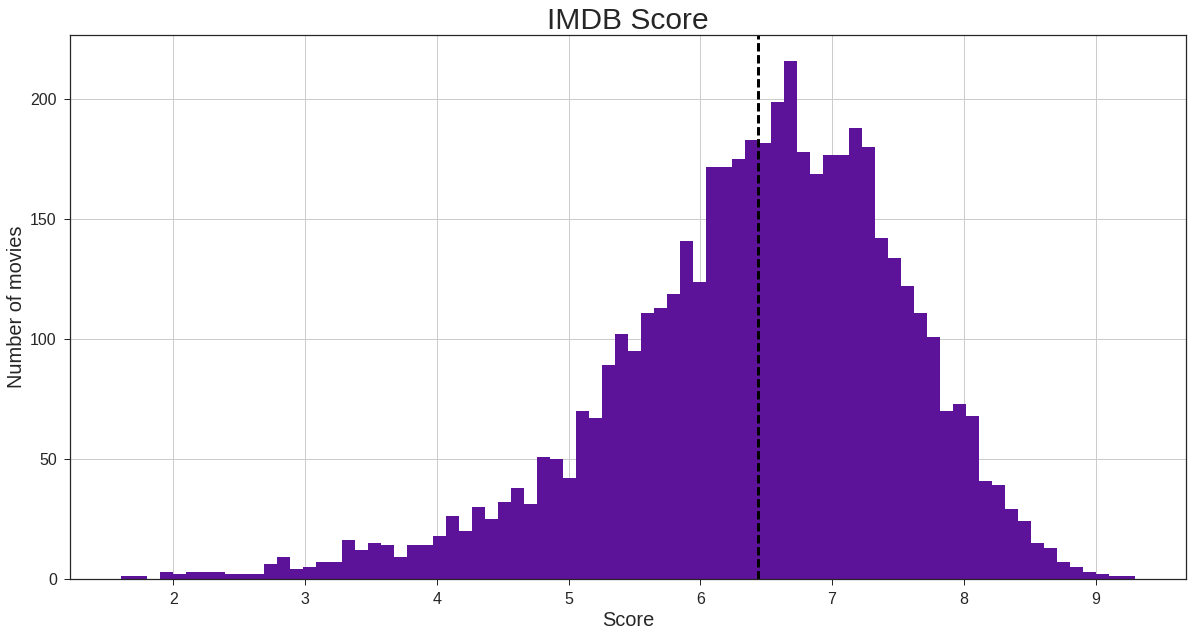

In [49]:
num_movies["imdb_score"].hist(bins=78)
plt.axvline(num_movies["imdb_score"].mean(), color='k', linestyle='dashed', linewidth=3)
plt.title("IMDB Score")
plt.ylabel("Number of movies")
plt.xlabel("Score")

In [50]:
top_movies = movies[["movie_title","imdb_score"]].sort_values("imdb_score", ascending = False).head(10)
worst_movies = movies[["movie_title","imdb_score"]].sort_values("imdb_score", ascending = True).head(10)
worst_movies = worst_movies.sort_values("imdb_score", ascending = False)
combo_movies = [top_movies, worst_movies]
combo = pd.concat(combo_movies)
combo.head(20)

,movie_title,imdb_score
1937,The Shawshank Redemption,9.3
3466,The Godfather,9.2
2824,Dekalog,9.1
4409,Kickboxer: Vengeance,9.1
2837,The Godfather: Part II,9.0
66,The Dark Knight,9.0
3481,Fargo,9.0
339,The Lord of the Rings: The Return of the King,8.9
4498,"The Good, the Bad and the Ugly",8.9
1874,Schindler's List,8.9


### Out of curiosity, I decided to look at the IMDB website and see the distribution of votes for the worst movie of all time (Justin Bieber: Never Say Never). I thought the overwhelming approval of females under 18 was quite entertaining.

![](http://i.imgur.com/faQb26I.jpg)

# End Basic Graphs; It's time for some analysis!

### I've split my analysis up into 4 'stories' or small sections, each independant from each other and studying different parts of the data for different understandings.

# Story Number 1: Top Keywords

### In this section I have taken the top 150 movies, sorted differently each time, and then found the most recurring keywords. This gives a good insight in to the varied taste of critics/voters, the public and directors. To achieve this I looked at the top rated movies, top grossing movies and finally the top budgetted movies. I decided to represent this data in a word cloud so that the information could be quickly visualised and taken in.

### Setting the parameters of the wordcloud and getting rid of stop words like "and".

In [51]:
source_count = 150
not_wanted = ["to", "and", "the", "boy", "in", "of", "girl", "based on", "based", "on", "box office"]
wc = 50

In [52]:
top500imdb = movies[["movie_title","imdb_score", "good_keywords"]].sort_values("imdb_score", ascending = False).head(source_count)
imdb_keywords = top500imdb["good_keywords"].apply(lambda x : pd.Series(x).value_counts()).sum().sort_values(ascending = False)


### The words came in a big list with lots of little lists inside it: not very useful. To fix this I made it into one big continous string that the wordcloud function can read from.

In [53]:
listy = top500imdb["good_keywords"].values.T.tolist()
#print listy
#''.join([str(r) for v in listy for r in v]) 
flat_listy = []
for x in listy:
    try:
        for y in x:
            flat_listy.append(y)
    except: "Filler"
flater_listy = " ".join(flat_listy)

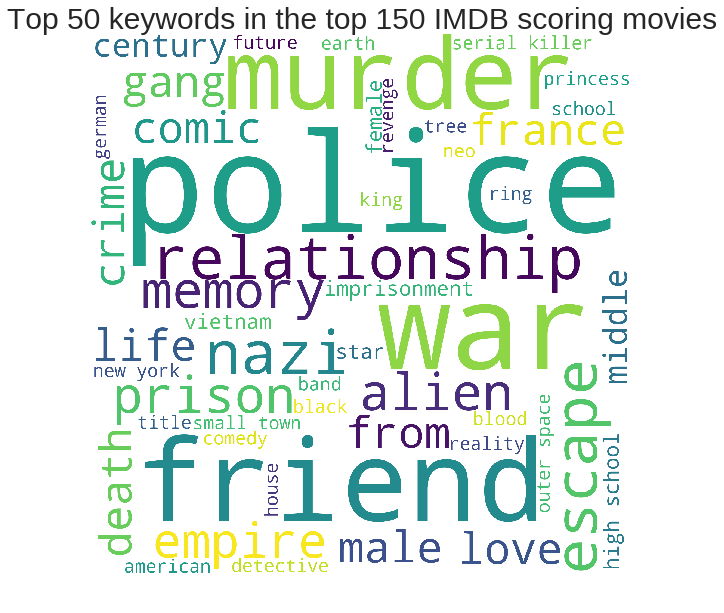

In [54]:
wordcloudimdb = WordCloud(width = 2000, height = 2000, stopwords=not_wanted, background_color='white', max_words = wc).generate(flater_listy)
plt.imshow(wordcloudimdb)
plt.axis("off")
plt.title('Top 50 keywords in the top 150 IMDB scoring movies')
plt.show()

In [55]:
culled_movies = movies.fillna(value=0, axis =1)

top500gross = movies[["movie_title","gross", "good_keywords"]].sort_values("gross", ascending = False).head(source_count)
gross_keywords = top500gross["good_keywords"].apply(lambda x : pd.Series(x).value_counts()).sum().sort_values(ascending = False)


In [56]:
lister = top500gross["good_keywords"].values.T.tolist()
flat_lister = []
for x in lister:
    try:
        for y in x:
            flat_lister.append(y)
    except: "Filler"
flater_lister = " ".join(flat_lister)

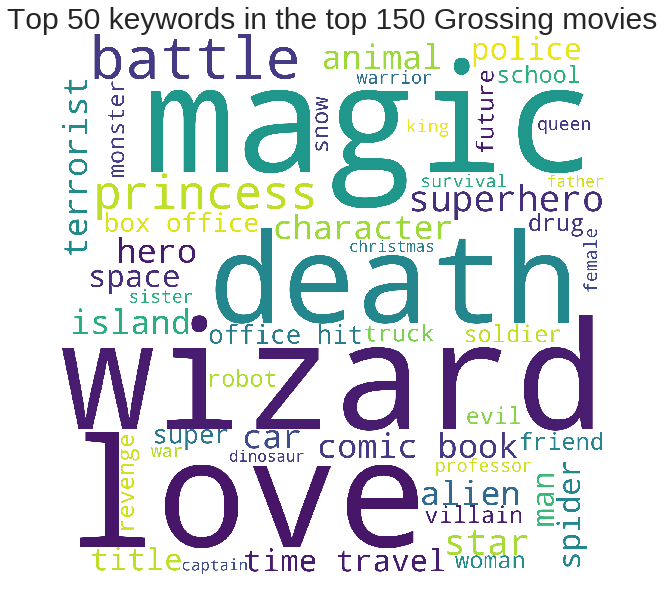

In [57]:
wordcloudgross = WordCloud(width = 2000, height = 2000, stopwords=not_wanted, background_color='white', max_words = wc).generate(flater_lister)
plt.imshow(wordcloudgross)
plt.axis("off")
plt.title('Top 50 keywords in the top 150 Grossing movies')
plt.show()

In [58]:
top500budget = movies[["movie_title","budget", "good_keywords"]].sort_values("budget", ascending = False).head(source_count)
budget_keywords = top500budget["good_keywords"].apply(lambda x : pd.Series(x).value_counts()).sum().sort_values(ascending = False)

In [59]:
listest = top500budget["good_keywords"].values.T.tolist()
flat_listest = []
for x in listest:
    try:
        for y in x:
            flat_listest.append(y)
    except: "Filler"
flater_listest = " ".join(flat_listest)

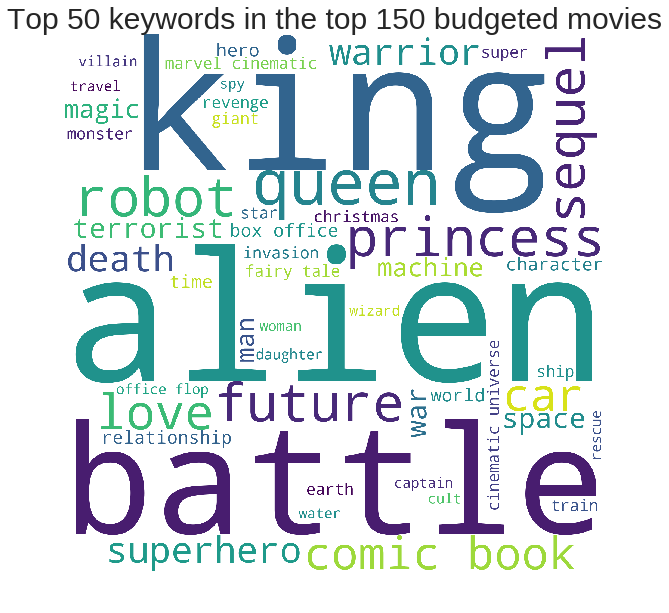

In [60]:
wordcloudbudget = WordCloud(width = 2000, height = 2000, stopwords=not_wanted, background_color='white', max_words = wc).generate(flater_listest)
plt.imshow(wordcloudbudget)
plt.axis("off")
plt.title('Top 50 keywords in the top 150 budgeted movies')
plt.show()

### These 3 word clouds are most useful when we can see them next to each other and there are some pretty clear and interesting differences between the three. IMDB score contains lots of serious and 'real' themes, such as war, police, murder and Nazi. Gross contains fantasy words and things like love and princess, the kinds of things that understandably appeal to the popular audience. Finally, the high budgetted films include lots of sci-fi words like alien and robot as well as fantasy words like king and battle, indicative of large scale and epic productions directors might spend a lot of money on.

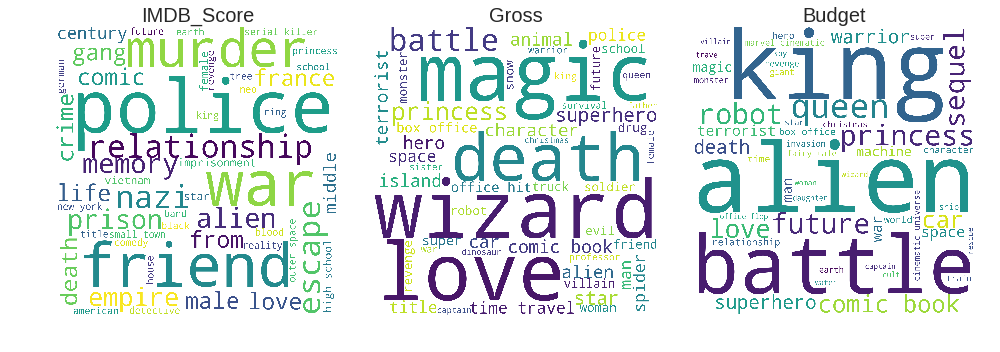

In [61]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(14, 5))
ax1.imshow(wordcloudimdb, aspect='auto')
ax1.set_title('IMDB_Score', size='20')
ax1.axis("off")
ax2.imshow(wordcloudgross, aspect='auto')
ax2.set_title('Gross', size='20')
ax2.axis("off")
ax3.imshow(wordcloudbudget, aspect='auto')
ax3.set_title('Budget', size='20')
ax3.axis("off")
plt.tight_layout()

# Story number 2: Most Profitable Films

### In this section I have experimented using ggplot as a method to present my data. Firstly I added two new columns to the dataframe, profit and return on investment, using some simple mathematical calculations.

In [62]:
movies["profit"] = (movies["gross"] - movies["budget"])
movies["ROI"] = ((movies["profit"]/movies["budget"])*100)

### I then sorted the movies by this new category of profit and took the top 15. With these 15 movies I compared their profit to their budget, meaning the left side of the graph has the highest ROI while the top side has the highest flat profit. There are no distinct trends in this graph but we can see that the left side of the graph contains older films; low budget but a very high profit.

In [63]:
profit_list = movies.sort_values("profit", ascending = False).head(15)
plist = profit_list['movie_title']
theme_xkcd()

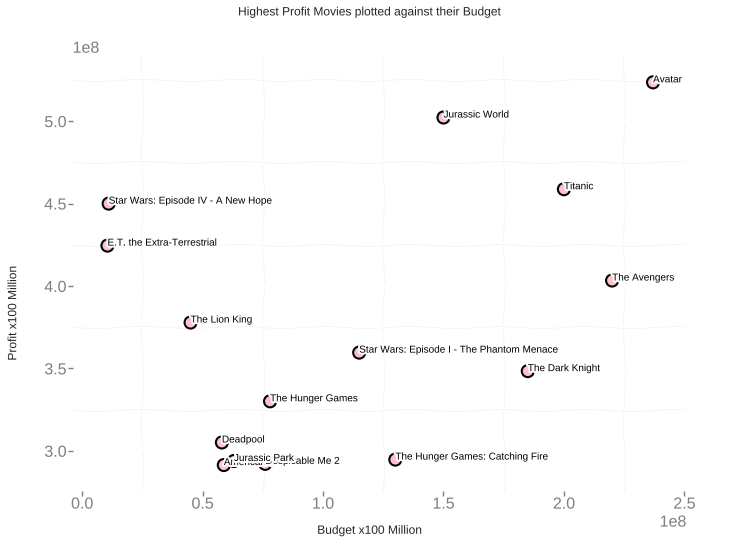

<ggplot: (8791479540785)>

In [64]:
profit_gg = ggplot(aes(x='budget', y='profit', label='movie_title'), data=profit_list)
profit_gg + geom_text(angle = 90, size = 'small', color='black') + theme_bw() + geom_point(color='black', size = 200) + geom_point(color='pink', size = 100) + xlab("Budget x100 Million") + ylab("Profit x100 Million") + ggtitle("Highest Profit Movies plotted against their Budget") 


### I have done the same thing again except sorted the list by the highest ROI movies. There is a fairly clear trend in this graph, with lots of movies being clustered to the left. The majority of these films are low budget horror movies, that end up being box office hits and generating an enormous profit, and therefore a large ROI based on thier low budget.

In [65]:
roi_head = movies[["movie_title", "ROI"]].sort_values("ROI", ascending = False).head(30)
roi_list = movies.sort_values("ROI", ascending = False).head(15)

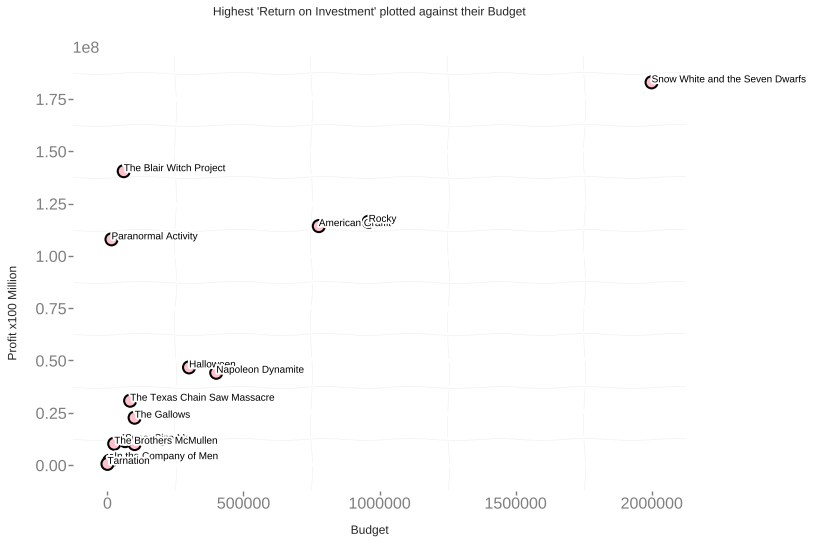

<ggplot: (8791474445629)>

In [66]:
roi_gg = ggplot(aes(x='budget', y='profit', label='movie_title'), data=roi_list)
roi_gg + geom_text(size = 'small', color='black') + theme_bw() + geom_point(color='black', size = 200) + geom_point(color='pink', size = 100) + xlab("Budget") + ylab("Profit x100 Million") + ggtitle("Highest 'Return on Investment' plotted against their Budget") 



# Story number 3: Highest rated lead actors and directors

### I wanted to see who the highest rated directors and actors were and then present it in a boxplot. To do this I had to get the median score of all the actors and sort them accordingly. From here I also had to cull the list and require a minimum number of movies to standardise the data and remove outliers due to many 'one-off' performances. It is interesting to see that the spread in top actors is tiny in comparison to that of directors who show much more variety.

In [67]:
actor_col = movies[["actor_1_name","imdb_score"]].sort_values("imdb_score", ascending = False).head()
print actor_col

        actor_1_name  imdb_score
1937  Morgan Freeman         9.3
3466       Al Pacino         9.2
2824  Krystyna Janda         9.1
4409    Matthew Ziff         9.1
2837  Robert De Niro         9.0


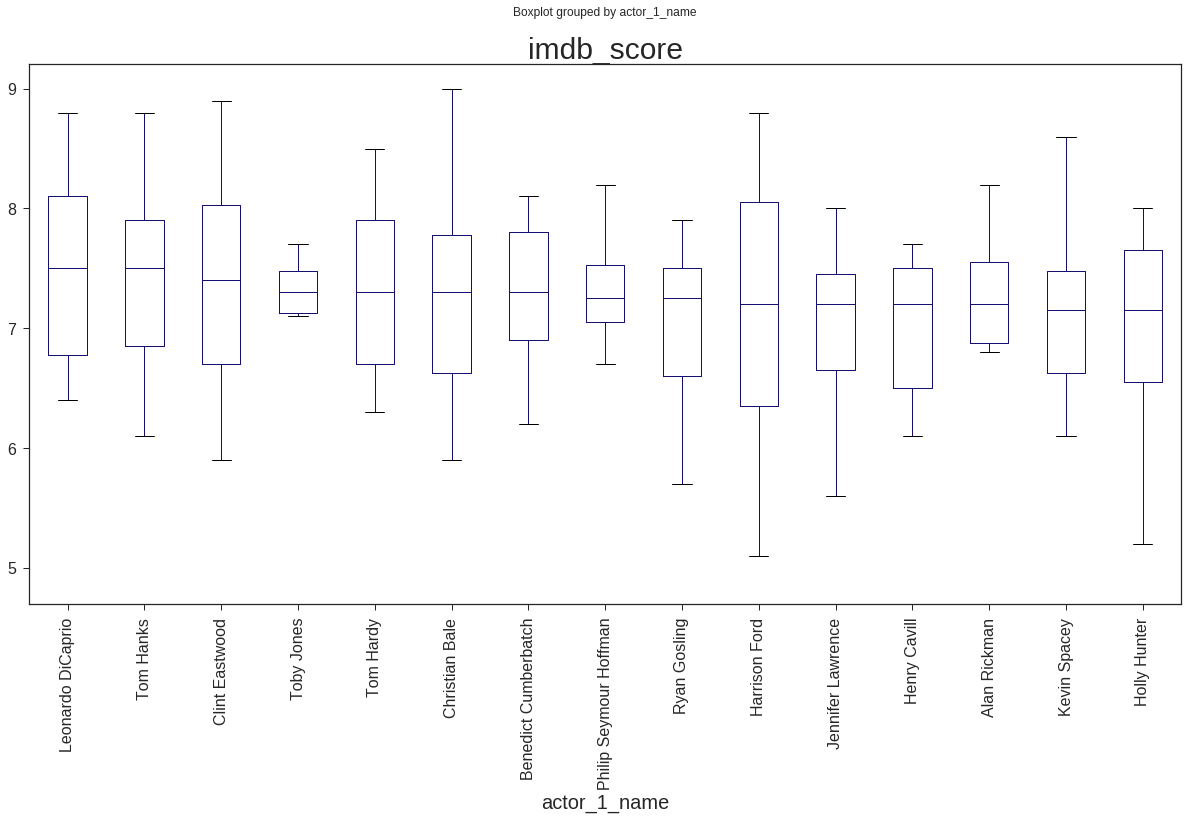

In [68]:
movies['sort_act'] = movies.groupby('actor_1_name', sort=False)['imdb_score'].rank(ascending=False)
actorMean = movies.groupby('actor_1_name', sort=True).agg(['median','count'])['imdb_score']
actorMean=actorMean.loc[actorMean['count']>5]
actorMean=actorMean.sort_values('median', ascending=False).head(15)
actorMean['rank']=range(1,actorMean['median'].size+1)
actorMean=actorMean.sort_index()
sns.set_palette(["#140f70","#ffff00"])
moviesTopActors=movies[['actor_1_name', 'imdb_score']].loc[movies['actor_1_name'].isin(actorMean.index.values)].sort_values(['actor_1_name', 'imdb_score'], ascending=False)
moviesTopActors.boxplot(column='imdb_score',by='actor_1_name',rot=90, fontsize=16, grid=False, positions=actorMean['rank'])


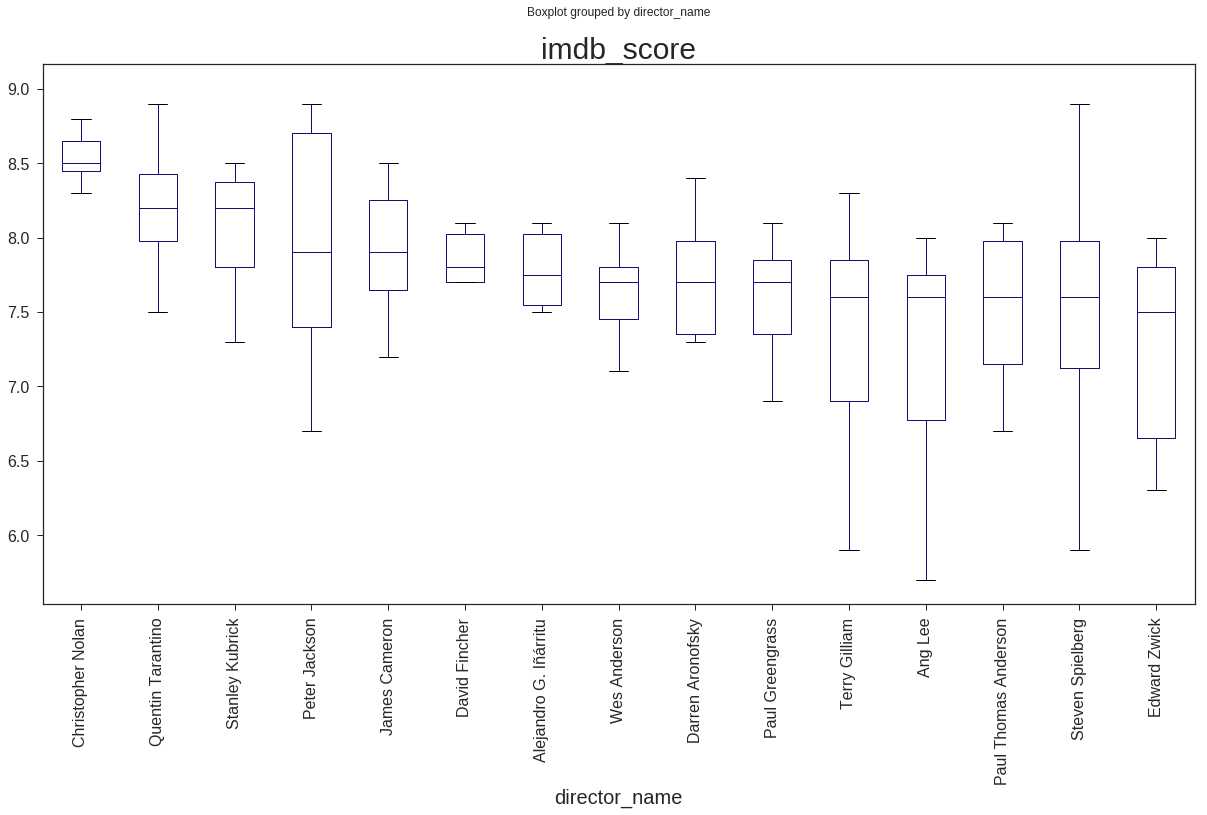

In [69]:
movies['sort_dir'] = movies.groupby('director_name', sort=False)['imdb_score'].rank(ascending=False)
dirMean = movies.groupby('director_name', sort=True).agg(['median','count'])['imdb_score']
dirMean=dirMean.loc[dirMean['count']>5]
dirMean=dirMean.sort_values('median', ascending=False).head(15)
dirMean['rank']=range(1,dirMean['median'].size+1)
dirMean=dirMean.sort_index()

moviesTopDir=movies[['director_name', 'imdb_score']].loc[movies['director_name'].isin(dirMean.index.values)].sort_values(['director_name', 'imdb_score'], ascending=False)
moviesTopDir.boxplot(column='imdb_score',by='director_name',rot=90, grid=False, fontsize=16, positions=dirMean['rank'])


# Story number 4: How to improve your IMDB score

### This is by far the most interesting and useful part of all my analysis; corrolation of different columns, primarily the influence of factors on the IMDB score of a movie. To start I used a scatter plot to look at the influence of duration, gross and age on IMDB score which presented some rather clear corrolations. 

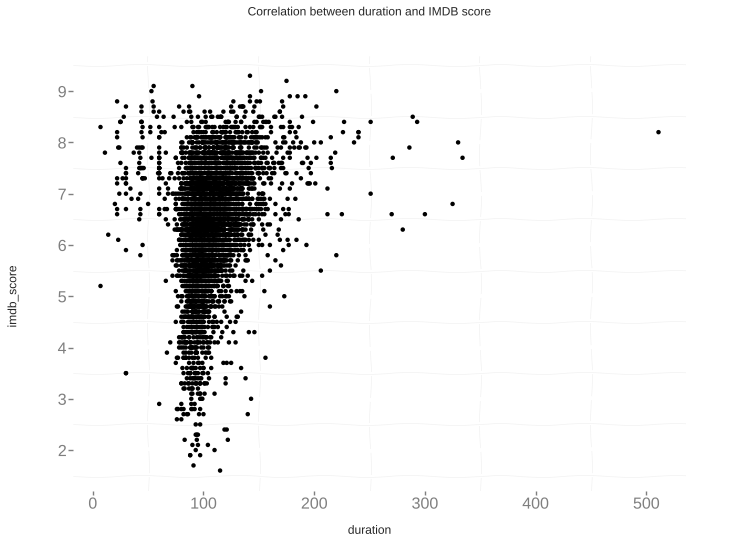

<ggplot: (8791474097725)>

In [70]:
dur_gg = ggplot(aes(x='duration', y='imdb_score'), data=movies)
dur_gg + geom_point() + theme_bw() + ggtitle("Correlation between duration and IMDB score") 

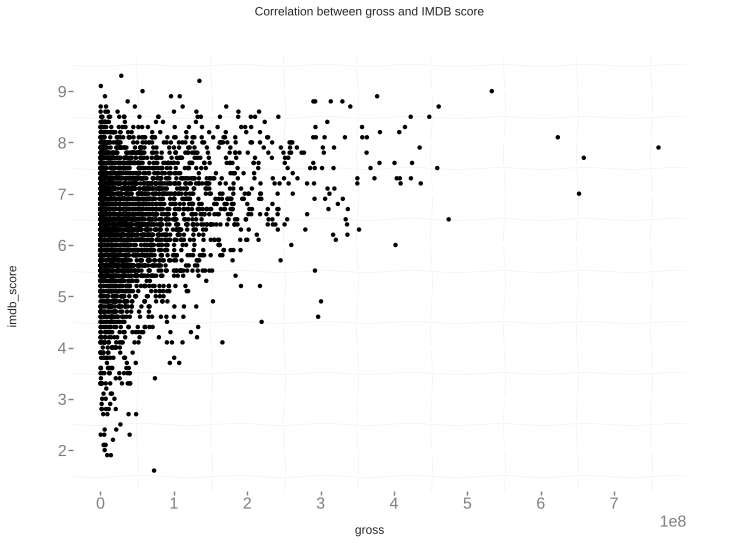

<ggplot: (8791474297833)>

In [71]:
bud_gg = ggplot(aes(x='gross', y='imdb_score'), data=movies)
bud_gg + geom_point() + theme_bw() + ggtitle("Correlation between gross and IMDB score") 

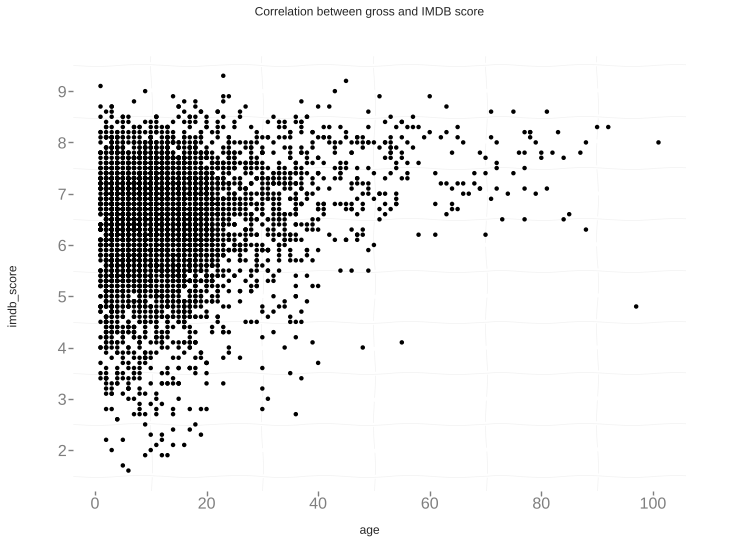

<ggplot: (8791474392129)>

In [72]:
movies['age'] = 2017 - movies['title_year']
dur_gg = ggplot(aes(x='age', y='imdb_score'), data=movies)
dur_gg + geom_point() + theme_bw() + ggtitle("Correlation between gross and IMDB score") 

### I then went on to create a corrolation heatmap to see how much influence different factors have on each other. 

In [73]:
corr_movies = movies
del corr_movies['sort_act']
del corr_movies['ROI']
del corr_movies['sort_dir']
del corr_movies['title_year']

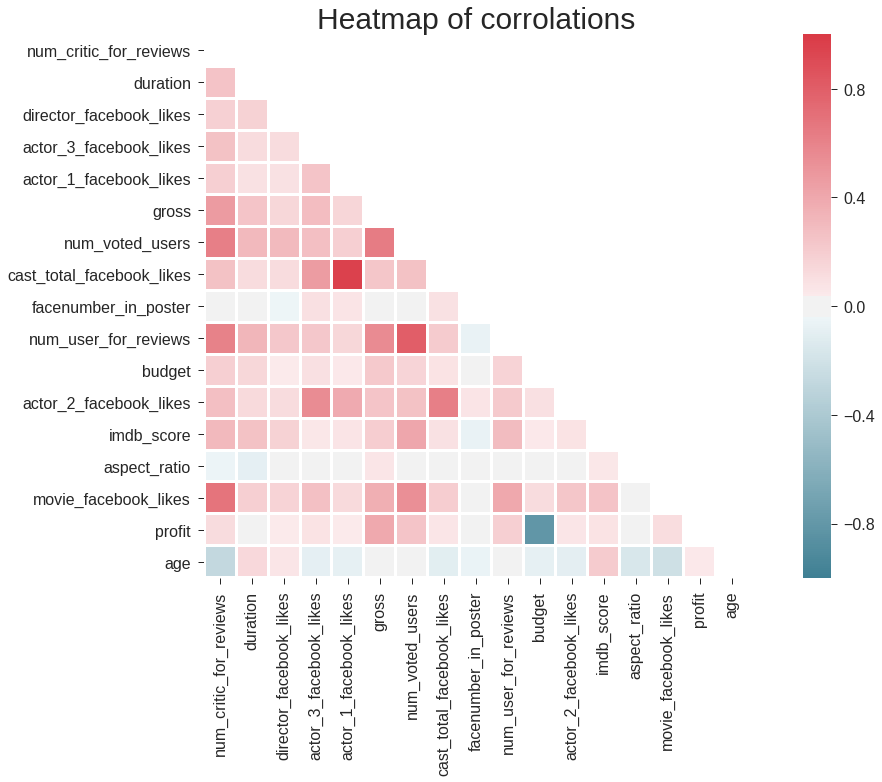

In [74]:
corr = corr_movies.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, linewidth=2, cmap=cmap, square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.title('Heatmap of corrolations')

### Finally, I looked at the influence of all factors directly on IMDB score and thus have an idea on what most heavily shapes a movies ratings.

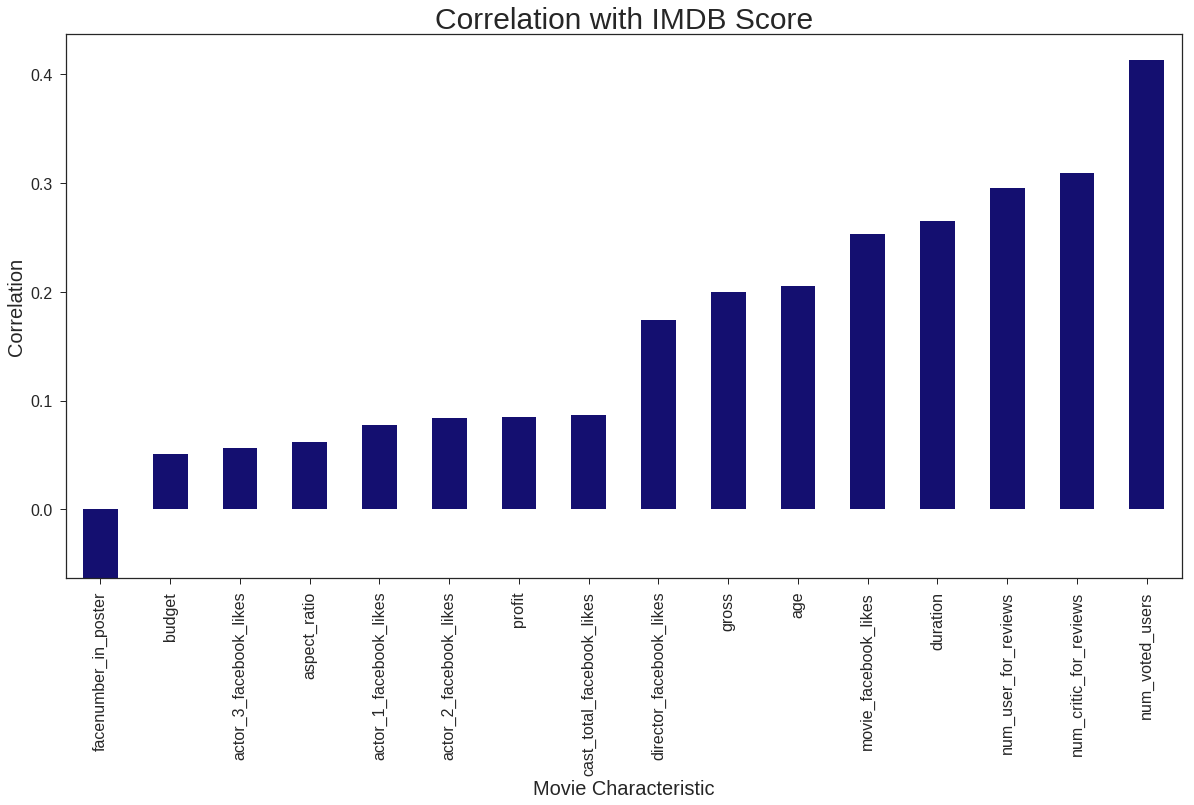

In [75]:
imdb_cor=corr['imdb_score'].sort_values()
imdb_cor=imdb_cor.drop('imdb_score')
imdb_cor.plot(kind="bar")
plt.title("Correlation with IMDB Score")
plt.ylabel("Correlation")
plt.xlabel("Movie Characteristic")
